<div class="alert alert-block alert-info">
  <center> <h1> ABCDEats inc - Customer Segmentation Analysis </h1> </center> <br>
  <center> <h2> Group 13 </h2> </center> <br>
  <center> <h3> 2024/2025 </h3> </center>
</div>


 #### This Project was done by:

Student Name - Oumaima Ben Hfaiedh <br>
Student id - 20240699 <br>
Contact e-mail - 20240699@novaims.unl.pt <br>

Student Name -  Ana Pedro Martins Caleiro <br>
Student id -  20240696 <br>
Contact e-mail - 20240696@novaims.unl.pt <br>

Student Name -  Érica Yeranosyan Parracho  <br>
Student id - 20240583 <br>
Contact e-mail - 20240583@novaims.unl.pt  <br>

Student Name -   Rute D’Alva Teixeira <br>
Student id -  20240667 <br>
Contact e-mail - 20240667@novaims.unl.pt <br>


# Table of Content (this table will be u



**0. [Context and Metadata](#context)**  

**1. [Importing Libraries and Loading Data](#importing-libraries-and-data)**  
   - [1.1 Importing Libraries](#importing-libraries)  
   - [1.2 Loading and Reading Data](#loading-and-reading-data)  
   - [1.3 Brief Preliminary Analysis](#brief-preliminary-analysis)
  

**2 [Exploratory Data Analysis](#EDA)** 
   - [2.1 Numerical Visualization](#numerical)
      - [2.1.1 Age at Injury](#age)
      - [2.1.2 Average Weekly Wage](#wage)
      - [2.1.3 Birth Year](#birth)
      - [2.1.4 IME-4 Count](#IME)
      - [2.1.5 Industry Count](#industrycount)
      - [2.1.6 WCIO Cause of Injury Code](#causecode)
      - [2.1.7 WCIO Nature of Injury Code](#naturecode)
      - [2.1.8 WCIO Part of body Code](#bodycode)
      - [2.1.9 Number of Dependents](#dependents)
   - [2.3 Categorical Visualization](#categorical)
     - [2.3.1 Attorney/Representative](#attorney)
     - [2.3.2 Carrier Name](#carrier)
     - [2.3.3 Alternative Dispute Resolution](#resolution)
     - [2.3.4 Carrier Type](#carriertype)
     - [2.3.5 Claim Injury Type](#claimtype)
     - [2.3.6 County of Injury](#county)
     - [2.3.7 COVID-19 Indicator](#covid)
     - [2.3.8 District Name](#district)
     - [2.3.9 Gender](#gender)
     - [2.3.10 Agreement Reached](#agreement)






# 0. Context and Metadata <a class="anchor" id="0-context"></a>

We are consultants for ABCDEats Inc (ABCDE), a food delivery service with a vast range of restaurants with diferent cuisines. We are going to analyse three months of data from three cities to provide a data-driven strategy than englobes 3 different segmentation perpectives. 

#### Metadata <a class="anchor" ></a>

`customer_id` - Unique identifier for each customer <br>
`customer_region` - Geographic region where the customer is located <br>
`customer_age` - Age of the customer <br>
`vendor_count` - Number of unique vendors the customer has ordered from <br>
`product_count` - Total number of products the customer has ordered <br>
`is_chain` - Indicates whether the customer’s order was from a chain restaurant <br>
`first_order` - Number of days from the start of the dataset when the customer first placed an order. <br>
`last_order` - Number of days from the start of the dataset when the customer most recently placed an order. <br>
`last_promo` - The category of the promotion or discount most recently used by the customer. <br>
`payment_method` - Method most recently used by the customer to pay for their orders. <br>
`CUI_(cuisine)`- The amount in monetary units spent by the customer from the indicated type of cuisine. <br>
- CUI_Beverages, CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts','CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', CUI_Thai <br>

`DOW_0 to DOW_6` - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday). <br>
`HR_0 to HR_23` - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM). <br>
ders.

# 1. Importing Libraries and Loading Data  <a class="anchor" id="importing-libraries-and-data"></a>

## 1.1. Importing Libraries <a class="anchor" id="importing-libraries"></a>

In [80]:
#All our libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


import seaborn as sns
from math import ceil

#For better resolution plots
%config InlineBackend.figure_format = 'retina' 

#Imputing Library
from sklearn.impute import KNNImputer

#Sclaer Library
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

#Clustering Libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
from collections import Counter 
from sklearn.metrics import silhouette_score, silhouette_samples
#Setting seaborn style
sns.set()


## 1.2. loading and Reading Data <a class="anchor" id="loading-and-reading-data"></a>

In [81]:
ABCDE = pd.read_csv('DM2425_ABCDEats_DATASET.csv', sep = ',')   #Our defined delimeter is a comma
pd.set_option('display.max_columns', None) #To be able too see all columns
ABCDE.head(5) #Checking if it is working correctly

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Defining Categorical Data

In [82]:
# Converting the datatype of categorical features from object to category

ABCDE['customer_region'] = ABCDE['customer_region'].astype('category')
ABCDE['last_promo'] = ABCDE['last_promo'].astype('category')
ABCDE['payment_method'] = ABCDE['payment_method'].astype('category')


#### Numerical Function

In [83]:
# Create the funtion for the numerical variables
# The function will get 3 parameters:
# - data: DataFrame containing the data in this case it will be train_copy
# - variable: The name of the numeric variable to plot
# - hue: str, optional, the name of the categorical variable for class separation (target variable)
def plot_numeric_variable(data, variable, hue=None):
    sns.set_style("white")
    # Setting up the figure with 3 subplots, with the adjusted size of (18, 4)
    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    # 1st graph. Histogram for the specified variable
    sns.histplot(data=data, x=variable, ax=ax[0], kde=True, color='darkgreen')
    ax[0].set_title(f"{variable} Distribution")
    ax[0].set_ylabel("Count")
    # 2ng graph. Boxplot for the specified variable
    sns.boxplot(data=data, x=variable, ax=ax[1], color='darkgreen')
    ax[1].set_title(f"{variable} Boxplot")
    ax[1].set_ylabel("")
    # 3th graph. Histogram for the specified variable by class (if hue is provided)
    if hue:
        sns.histplot(data=data, x=variable, hue=hue, multiple='stack', ax=ax[2], kde=True)
        ax[2].set_title(f"{variable} by {hue}")
    else:
        ax[2].axis('off')  # Turn off the third subplot when no hue is provided
    
    ax[2].set_ylabel("Count")
    # Adjust layout and show
    fig.tight_layout()
    plt.show()

#### Categorical Function

In [84]:
# Generate the function for categorical variables
# We get 2 parameters:
#  - data: DataFrame containing the data
#  - categorical_var: str, the name of the categorical variable to analyze
def plot_categorical_analysis(data, categorical_var):
    sns.set_style("white")
    # Set up the figure for one plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # 1. Countplot (Histogram for categorical data)
    sns.countplot(data=data, x=categorical_var, ax=ax, color = 'darkgreen')  # Removed palette argument
    ax.set_title(f"{categorical_var} Distribution")
    ax.set_xlabel(categorical_var)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=65)  # Rotate x labels for better readability
  
    # Show the plot
    plt.show()


### 2.3.1 Incoherences <a class="anchor" id="22-incoherencies"></a>

#### 2.3.1.1 vendor_count = 0 <a class="anchor" id="22-incoherencies"></a>

vendor_count equals 0 meaning that the customer didn't pass an order

In [85]:
ABCDE[ABCDE['vendor_count'] == 0].describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
customer_age,138.0,27.065217,6.951560,17.0,22.00,26.0,30.00,55.0
vendor_count,138.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
product_count,138.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
is_chain,138.0,0.543478,0.499921,0.0,0.00,1.0,1.00,1.0
first_order,138.0,44.659420,25.934645,1.0,22.25,44.0,66.75,89.0
last_order,138.0,44.659420,25.934645,1.0,22.25,44.0,66.75,89.0
CUI_American,138.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
CUI_Asian,138.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
CUI_Beverages,138.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
CUI_Cafe,138.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [86]:
ABCDE[ABCDE['vendor_count'] == 0].describe(include='category').T

,count,unique,top,freq
customer_region,138,1,8670,138
last_promo,138,4,-,51
payment_method,138,3,CARD,54


#### 2.3.1.2 product_count = 0 <a class="anchor" id="22-incoherencies"></a>

It's considered an incoherence since the customer didn't buy any product in his order

In [87]:
ABCDE[ABCDE['product_count'] == 0].describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
customer_age,156.0,27.358974,6.921634,17.0,22.0,26.0,31.00,55.00
vendor_count,156.0,0.115385,0.320514,0.0,0.0,0.0,0.00,1.00
product_count,156.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00
is_chain,156.0,0.480769,0.501239,0.0,0.0,0.0,1.00,1.00
first_order,156.0,44.801282,26.427605,1.0,21.0,42.5,67.25,89.00
last_order,156.0,44.801282,26.427605,1.0,21.0,42.5,67.25,89.00
CUI_American,156.0,0.105256,1.314652,0.0,0.0,0.0,0.00,16.42
CUI_Asian,156.0,0.122821,1.534028,0.0,0.0,0.0,0.00,19.16
CUI_Beverages,156.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00
CUI_Cafe,156.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00


In [88]:
ABCDE[(ABCDE['product_count'] == 0) & (ABCDE['vendor_count']==1)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
6180,aed85972bb,4660,27.0,1,0,0,6.0,6,DISCOUNT,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6183,b2ebe2e6e0,4660,43.0,1,0,0,6.0,6,-,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.74,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10995,6f723d9894,4660,36.0,1,0,0,13.0,13,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.77,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
14137,9d74f2ac81,4660,27.0,1,0,0,19.0,19,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.03,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14611,27b7eed8fa,4660,35.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.94,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14639,6c9e68b2e7,4660,22.0,1,0,0,20.0,20,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,22.24,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16099,c0b330c4df,4660,27.0,1,0,0,23.0,23,DELIVERY,CARD,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,14.42,0.0,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17200,68c4faeecb,4660,25.0,1,0,0,26.0,26,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.75,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19972,48e8abd5bf,4660,34.0,1,0,0,33.0,33,DELIVERY,CASH,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.52,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
23095,7bfc19bd89,4660,21.0,1,0,0,42.0,42,DISCOUNT,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,11.84,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [89]:
ABCDE[(ABCDE['product_count'] == 0) & (ABCDE['vendor_count']==1)].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,18.0,29.611111,6.427321,21.0,26.0,27.500,33.500,43.00
vendor_count,18.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.00
product_count,18.0,0.000000,0.000000,0.0,0.0,0.000,0.000,0.00
is_chain,18.0,0.000000,0.000000,0.0,0.0,0.000,0.000,0.00
first_order,18.0,45.888889,30.758813,6.0,20.0,37.500,75.250,89.00
last_order,18.0,45.888889,30.758813,6.0,20.0,37.500,75.250,89.00
CUI_American,18.0,0.912222,3.870231,0.0,0.0,0.000,0.000,16.42
CUI_Asian,18.0,1.064444,4.516055,0.0,0.0,0.000,0.000,19.16
CUI_Beverages,18.0,0.000000,0.000000,0.0,0.0,0.000,0.000,0.00
CUI_Cafe,18.0,0.000000,0.000000,0.0,0.0,0.000,0.000,0.00


In [90]:
ABCDE[(ABCDE['product_count'] == 0) & (ABCDE['vendor_count']==1)].describe(include='category').T

,count,unique,top,freq
customer_region,18,1,4660,18
last_promo,18,4,DELIVERY,8
payment_method,18,3,CARD,9


In [91]:
ABCDE[(ABCDE['product_count'] == 0) & (ABCDE['vendor_count']==0)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
1449,4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1476,c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1488,f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2486,c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3391,1b7c34738e,8670,24.0,0,0,0,3.0,3,-,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31377,177ede2420,8670,30.0,0,0,1,86.0,86,-,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31553,0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31667,0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31680,28ed1f1e3f,8670,20.0,0,0,0,89.0,89,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 3. Data Preprocessing  <a class="anchor" id="3-feature-engineering"></a>

## 3.1. Duplicates <a class="anchor" id="22-incoherencies"></a>

In [92]:
ABCDE.set_index('customer_id', inplace=True)

In [93]:
ABCDE[ABCDE.duplicated(keep=False)]
#This code will display the duplicated rowswhich are 120 rows in Total

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
412c8c0b2d,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,10.36,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4336560739,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,10.36,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
11a56d6fbf,4660,32.0,3,4,3,1.0,43,-,CARD,10.15,0.00,0.0,0.0,0.0,0.00,0.0,0.0,6.29,0.0,14.73,0.0,0.0,0.0,0.0,4,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0
dcc76a0a1b,4660,32.0,3,4,3,1.0,43,-,CARD,10.15,0.00,0.0,0.0,0.0,0.00,0.0,0.0,6.29,0.0,14.73,0.0,0.0,0.0,0.0,4,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0
b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,3,2,3,1,1,0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a6bdd77ae2,8670,30.0,1,1,0,83.0,83,DELIVERY,DIGI,0.00,11.59,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1f616608ed,2360,23.0,1,2,1,87.0,87,DELIVERY,CARD,0.00,10.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6020a9ce3d,2360,23.0,1,2,1,87.0,87,DELIVERY,CARD,0.00,10.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [94]:
ABCDE.drop_duplicates(inplace=True)

## 3.2. Incoherences <a class="anchor" id="22-incoherencies"></a>

Here we decided to remove the rows that were identified as aniomalies in section anomalies:

#### 3.2.1 Vendor_count = 0 <a class="anchor" id="22-incoherencies"></a>

In [95]:
ABCDE = ABCDE[ABCDE['vendor_count'] != 0]

#### 3.2.2 product_count = 0 <a class="anchor" id="22-incoherencies"></a>

In [96]:
ABCDE = ABCDE[ABCDE['product_count'] != 0]

#### 3.2.3 Is_chain transform it into boolean <a class="anchor" id="22-incoherencies"></a>

In [97]:
ABCDE['is_chain'] = np.where(ABCDE['is_chain'] > 1, 1, ABCDE['is_chain'])

In [98]:
ABCDE['is_chain'].unique()

array([1, 0], dtype=int64)

## 3.3. Missing Values <a class="anchor" id="22-incoherencies"></a>

#### 3.3.1 first order <a class="anchor" id="22-incoherencies"></a>

In [99]:
ABCDE['first_order'] = ABCDE['first_order'].fillna(ABCDE['last_order'].apply(lambda x: 0 if x == 0 else np.nan))
# apply for the first_order column a function that will replace with the value of last_order if it is 0 or leave it unchanged if it isn't 0

#### 3.3.2 HR_0 <a class="anchor" id="22-incoherencies"></a>

In [100]:
ABCDE['HR_0'] = ABCDE['HR_0'].fillna(ABCDE.loc[:, 'DOW_0':'DOW_6'].sum(axis=1) - ABCDE.loc[:, 'HR_1':'HR_23'].sum(axis=1))
#replace it with sum of the difference

##### For the missing values of customer age we will impute them using KNN after scaling

## 3.4. Outliers <a class="anchor" id="22-incoherencies"></a>

#### IQR method

In [101]:
ABCDE.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [102]:
cuisine_columns= ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

In [103]:
# Eliminate outliers in AVGGIFT or other selected columns (e.g., cuisine_columns)

# Calculate the interquartile range (IQR) for the selected columns
#q25 = ABCDE[cuisine_columns].quantile(0.02)
#q75 = ABCDE[cuisine_columns].quantile(0.98)
#iqr = q75 - q25

# Calculate the upper and lower bounds for outliers
#upper_lim = q75 + 1.5 * iqr
#lower_lim = q25 - 1.5 * iqr

# Filter the data to remove outliers
#filtered_df = ABCDE[cuisine_columns][~((ABCDE[cuisine_columns] < lower_lim) | (ABCDE[cuisine_columns] > upper_lim)).any(axis=1)]
#indices = filtered_df.index.to_list()

# Retain only the non-outlier rows from the original dataframe
#ABCDE_clean = ABCDE.loc[indices]

# Display the percentage of data kept
#print('Percentage of data kept after removing outliers:', 
#      np.round(ABCDE_clean.shape[0] / ABCDE.shape[0] * 100, 2))


#### Manual Thresholding


In [104]:
filters_man = (
    (ABCDE['vendor_count'] <= 35)
    &
    (ABCDE['product_count'] <= 100)
    &
    (ABCDE['CUI_American'] <= 140)
    &
    (ABCDE['CUI_Asian'] <= 350)
    &
    (ABCDE['CUI_Beverages'] <= 140)
    &
    (ABCDE['CUI_Chicken Dishes'] <= 60)
    &
    (ABCDE['CUI_Chinese'] <= 180)
    &
    (ABCDE['CUI_Desserts'] <= 70)
    &
    (ABCDE['CUI_Healthy'] <= 125)
    &
    (ABCDE['CUI_Indian'] <= 140)
    &
    (ABCDE['CUI_Italian'] <= 170)
    &
    (ABCDE['CUI_Japanese'] <= 120)
    &
    (ABCDE['CUI_Noodle Dishes'] <= 80)
    &
    (ABCDE['CUI_OTHER'] <= 175)
    &
    (ABCDE['CUI_Street Food / Snacks'] <= 220)
    &
    (ABCDE['CUI_Thai'] <= 210)
)

ABCDE_clean = ABCDE[filters_man].copy()

In [105]:
print('Percentage of data kept after removing outliers:', np.round(ABCDE_clean.shape[0] / ABCDE.shape[0], 4))


Percentage of data kept after removing outliers: 0.9957


## 3.5. Feature Engineering  <a class="anchor" id="3-feature-engineering"></a>

<a class="anchor" id="age">

### 3.5.1. Weekdays

</a>

In [106]:
ABCDE_clean["Weekdays"]= ABCDE_clean[["DOW_1","DOW_2","DOW_3","DOW_4","DOW_5"]].sum(axis=1)

In [107]:
ABCDE_clean.drop(columns=["DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5"], inplace=True)

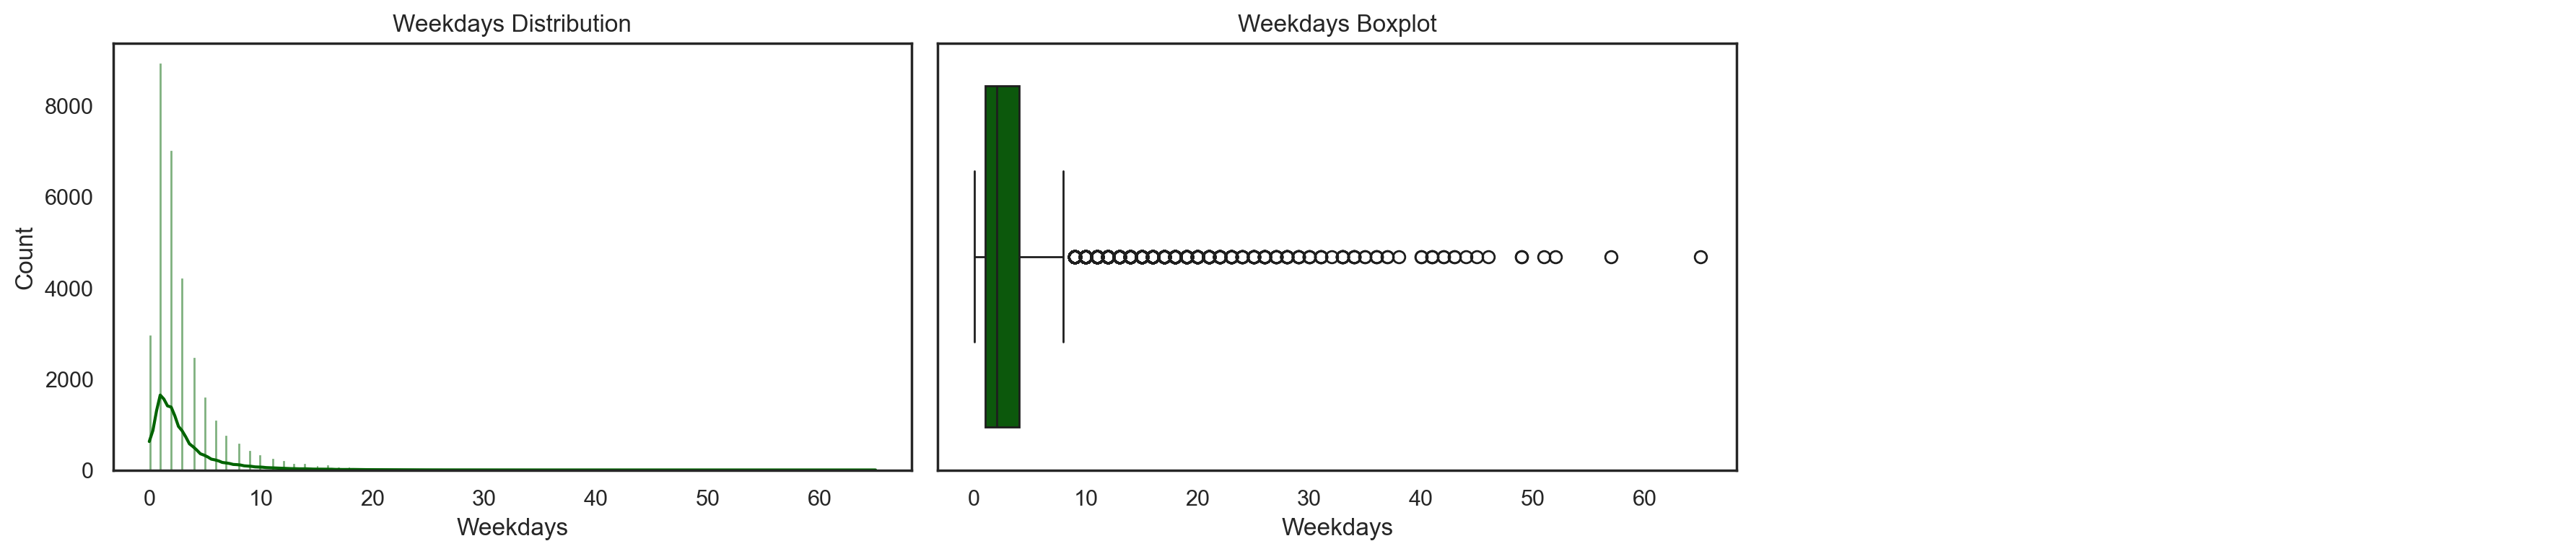

In [108]:
plot_numeric_variable(data=ABCDE_clean, variable="Weekdays")

<a class="anchor" id="age">

### 3.5.2. Weekends

</a>

In [109]:
ABCDE_clean["Weekends"]= ABCDE_clean[["DOW_0","DOW_6"]].sum(axis=1)

In [110]:
ABCDE_clean.drop(columns=["DOW_0", "DOW_6"], inplace=True)

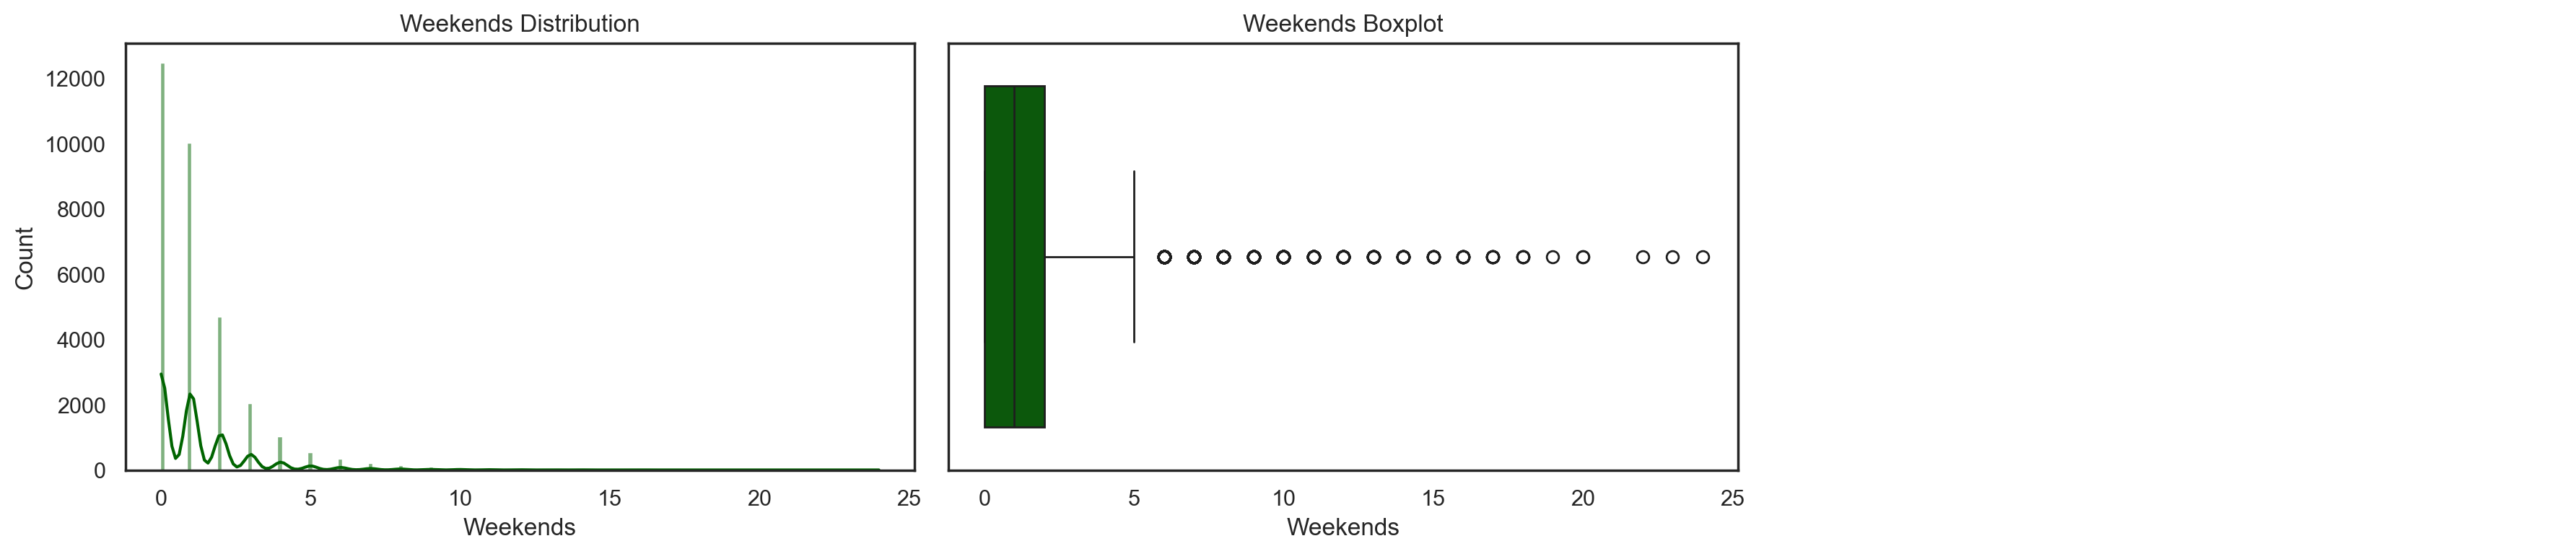

In [111]:
plot_numeric_variable(data=ABCDE_clean, variable="Weekends")

<a class="anchor" id="age">

### 3.5.3. Morning

</a>

In [112]:
ABCDE_clean["Morning"]=ABCDE_clean[["HR_6","HR_7","HR_8","HR_9","HR_10","HR_11"]].sum(axis=1)

In [113]:
ABCDE_clean.drop(columns=["HR_6","HR_7","HR_8","HR_9","HR_10","HR_11"], inplace=True)

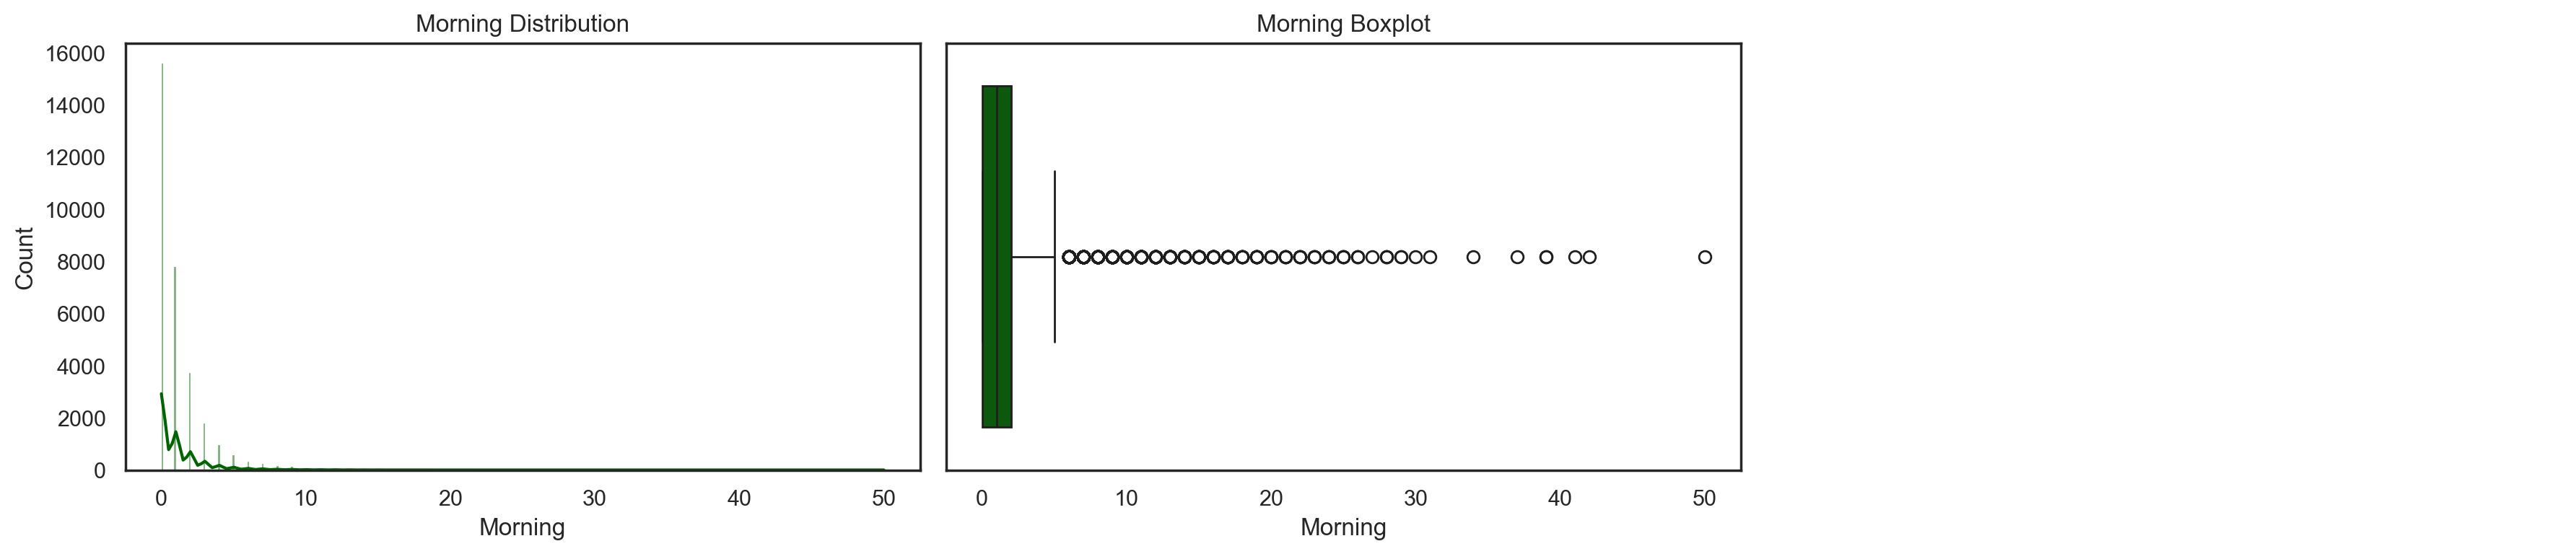

In [114]:
plot_numeric_variable(data=ABCDE_clean, variable="Morning")

<a class="anchor" id="age">

### 3.5.4. Afternoon

</a>

In [115]:
ABCDE_clean["Afternoon"]=ABCDE_clean[["HR_12","HR_13","HR_14","HR_15","HR_16","HR_17"]].sum(axis=1)

In [116]:
ABCDE_clean.drop(columns=["HR_12","HR_13","HR_14","HR_15","HR_16","HR_17"], inplace=True)

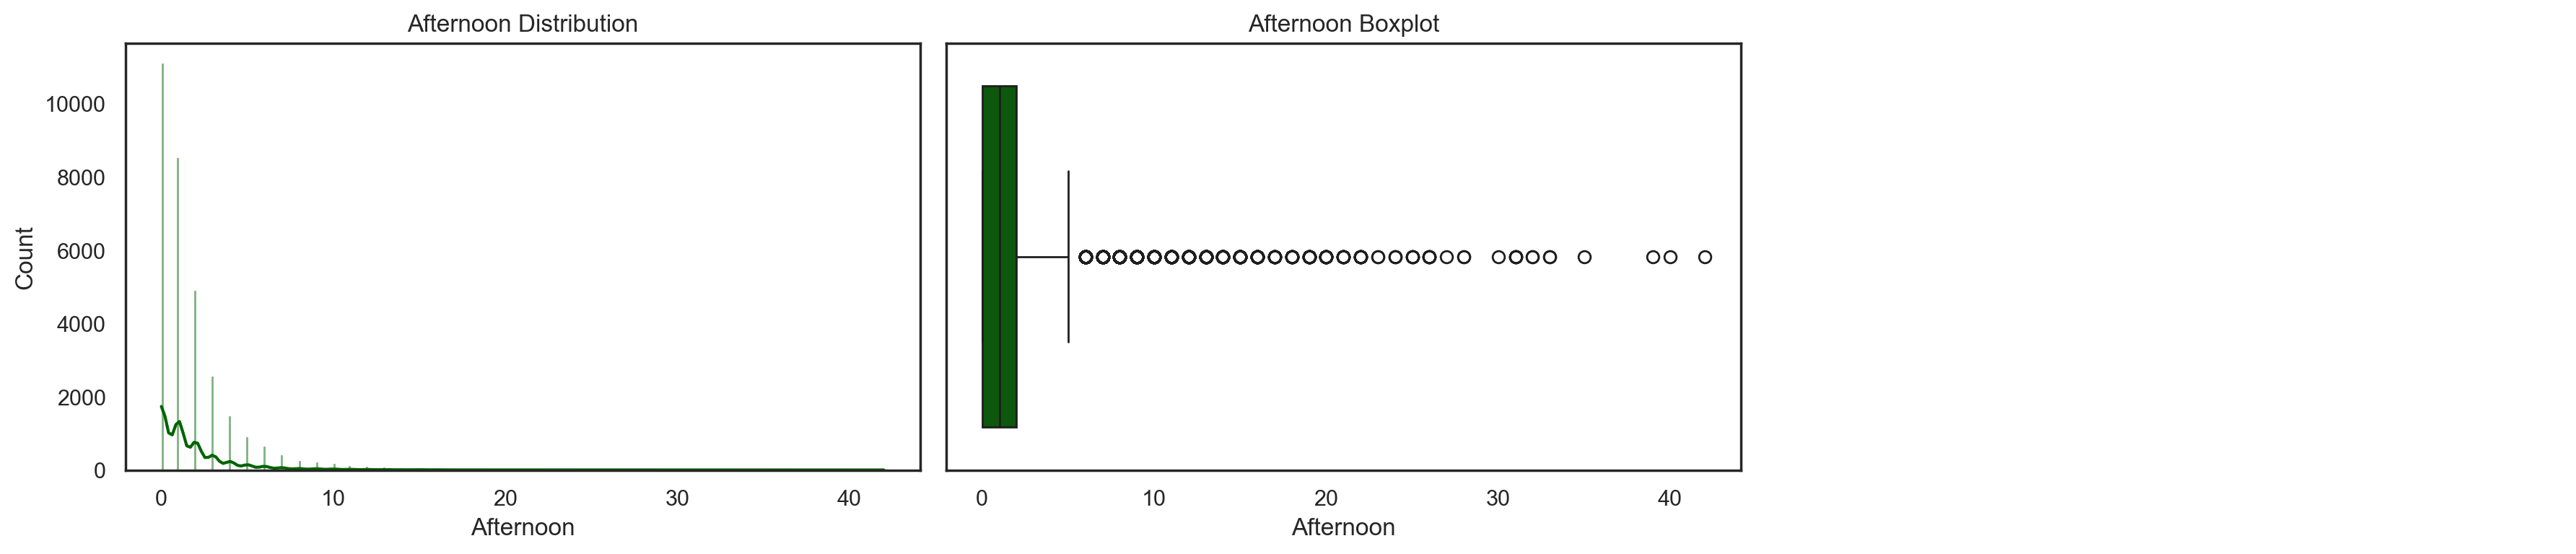

In [117]:
plot_numeric_variable(data=ABCDE_clean, variable="Afternoon")

<a class="anchor" id="age">

### 3.5.5. Evening

</a>

In [118]:
ABCDE_clean["Evening"]=ABCDE_clean[["HR_18","HR_19","HR_20","HR_21","HR_22","HR_23"]].sum(axis=1)

In [119]:
ABCDE_clean.drop(columns=["HR_18","HR_19","HR_20","HR_21","HR_22","HR_23"], inplace=True)

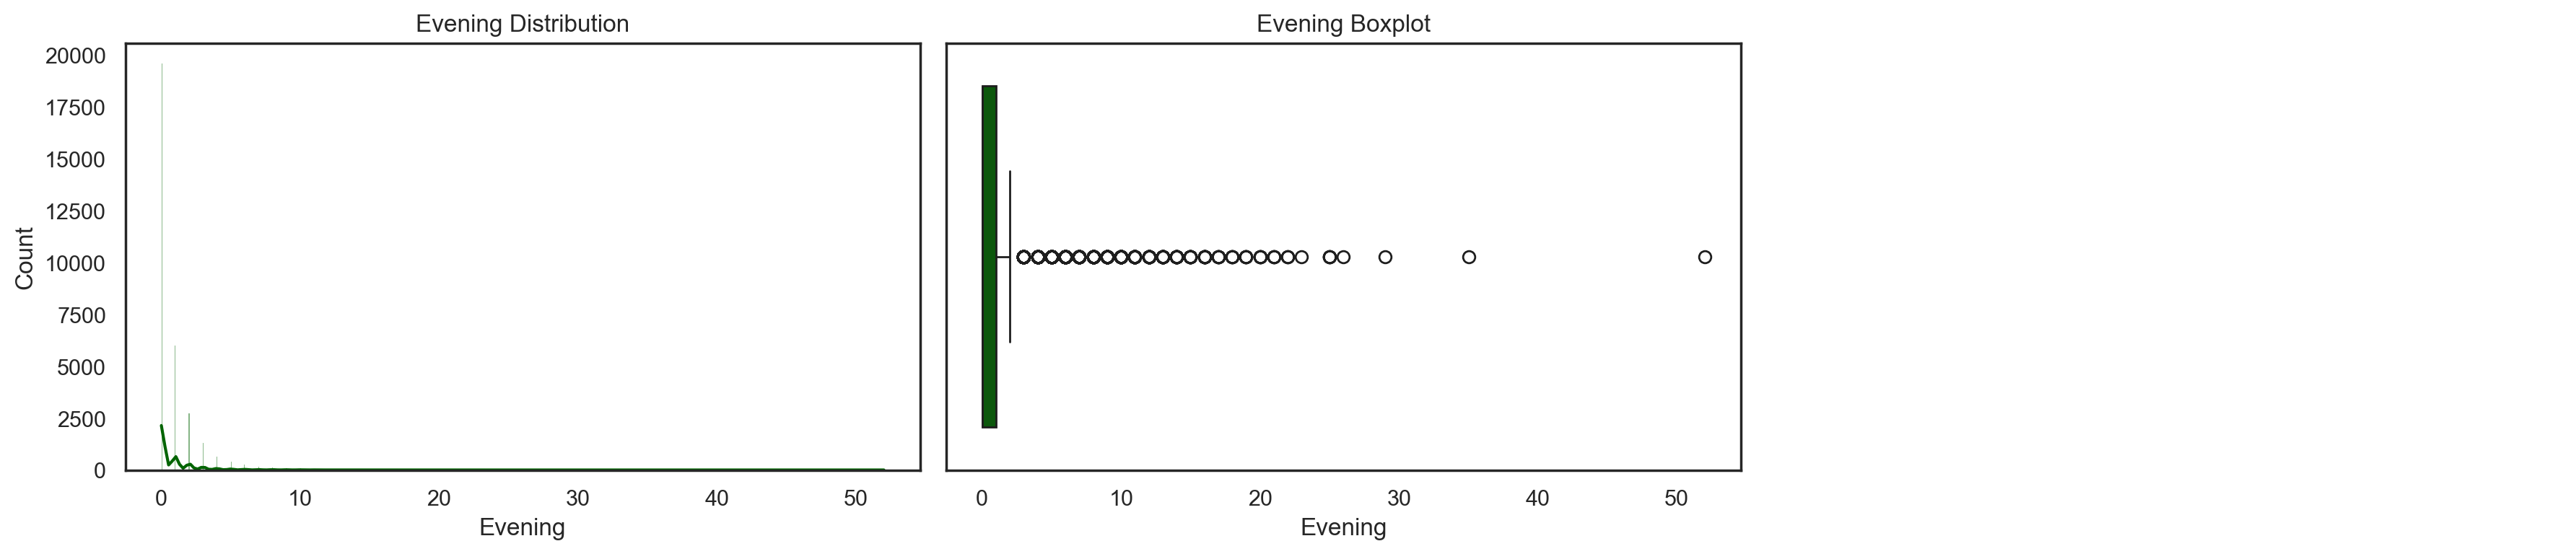

In [120]:
plot_numeric_variable(data=ABCDE_clean, variable="Evening")

<a class="anchor" id="age">

### 3.5.6. Night

</a>

In [121]:
ABCDE_clean["Night"]=ABCDE_clean[["HR_0","HR_1","HR_2","HR_3","HR_4","HR_5"]].sum(axis=1)

In [122]:
ABCDE_clean.drop(columns=["HR_0","HR_1","HR_2","HR_3","HR_4","HR_5"], inplace=True)

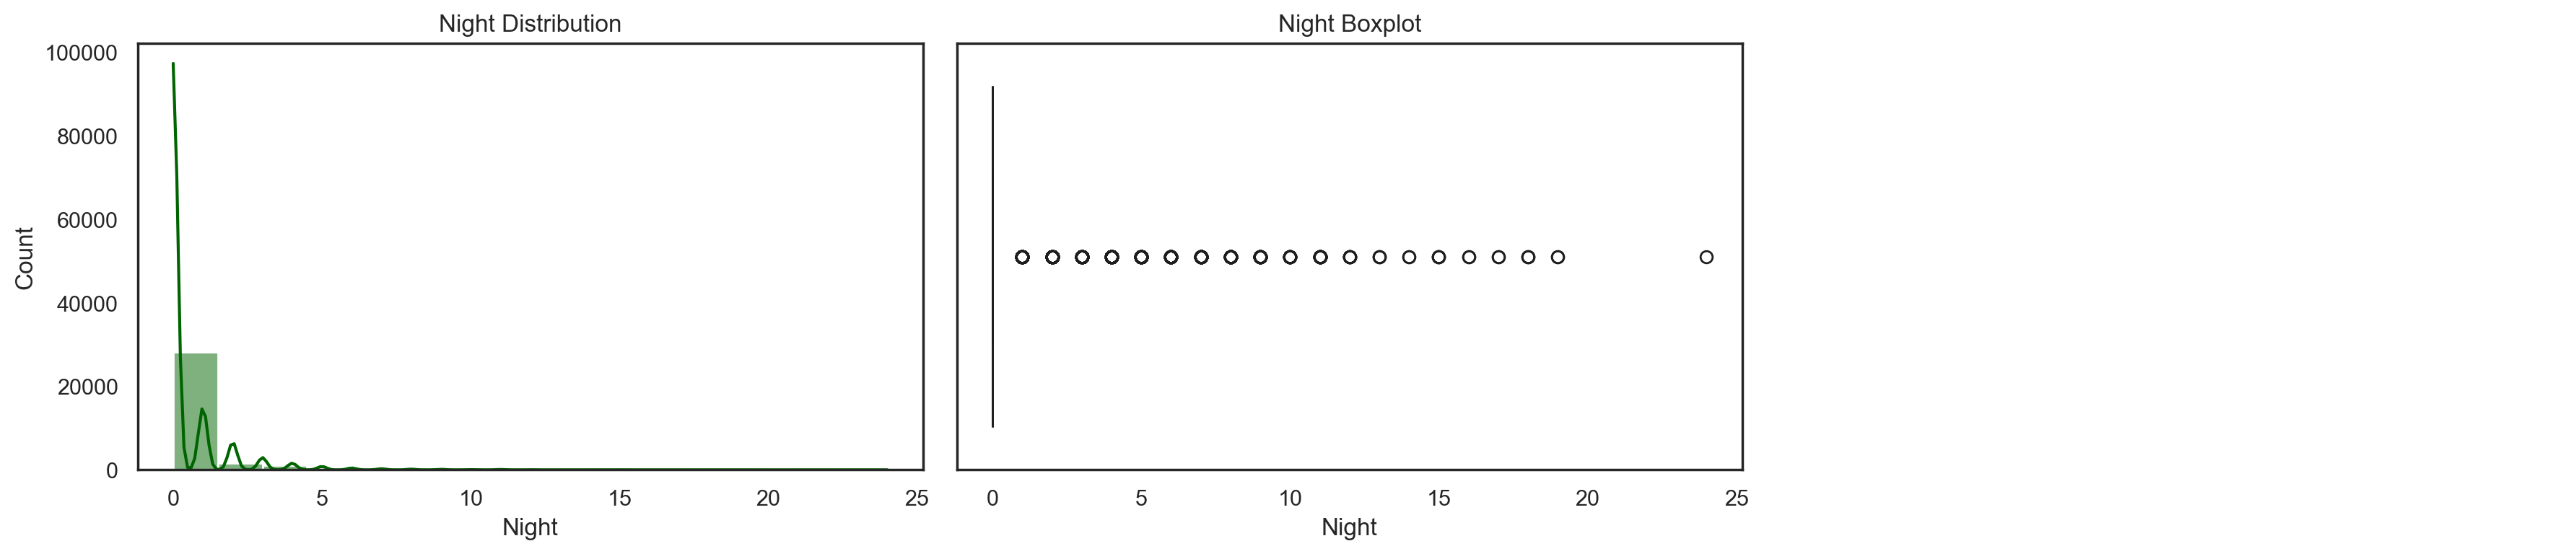

In [123]:
plot_numeric_variable(data=ABCDE_clean, variable="Night")

<a class="anchor" id="age">

### 3.5.7. Frequency

</a>

In [124]:
ABCDE_clean["Frequency"]= ABCDE_clean[["Weekdays","Weekends"]].sum(axis=1)

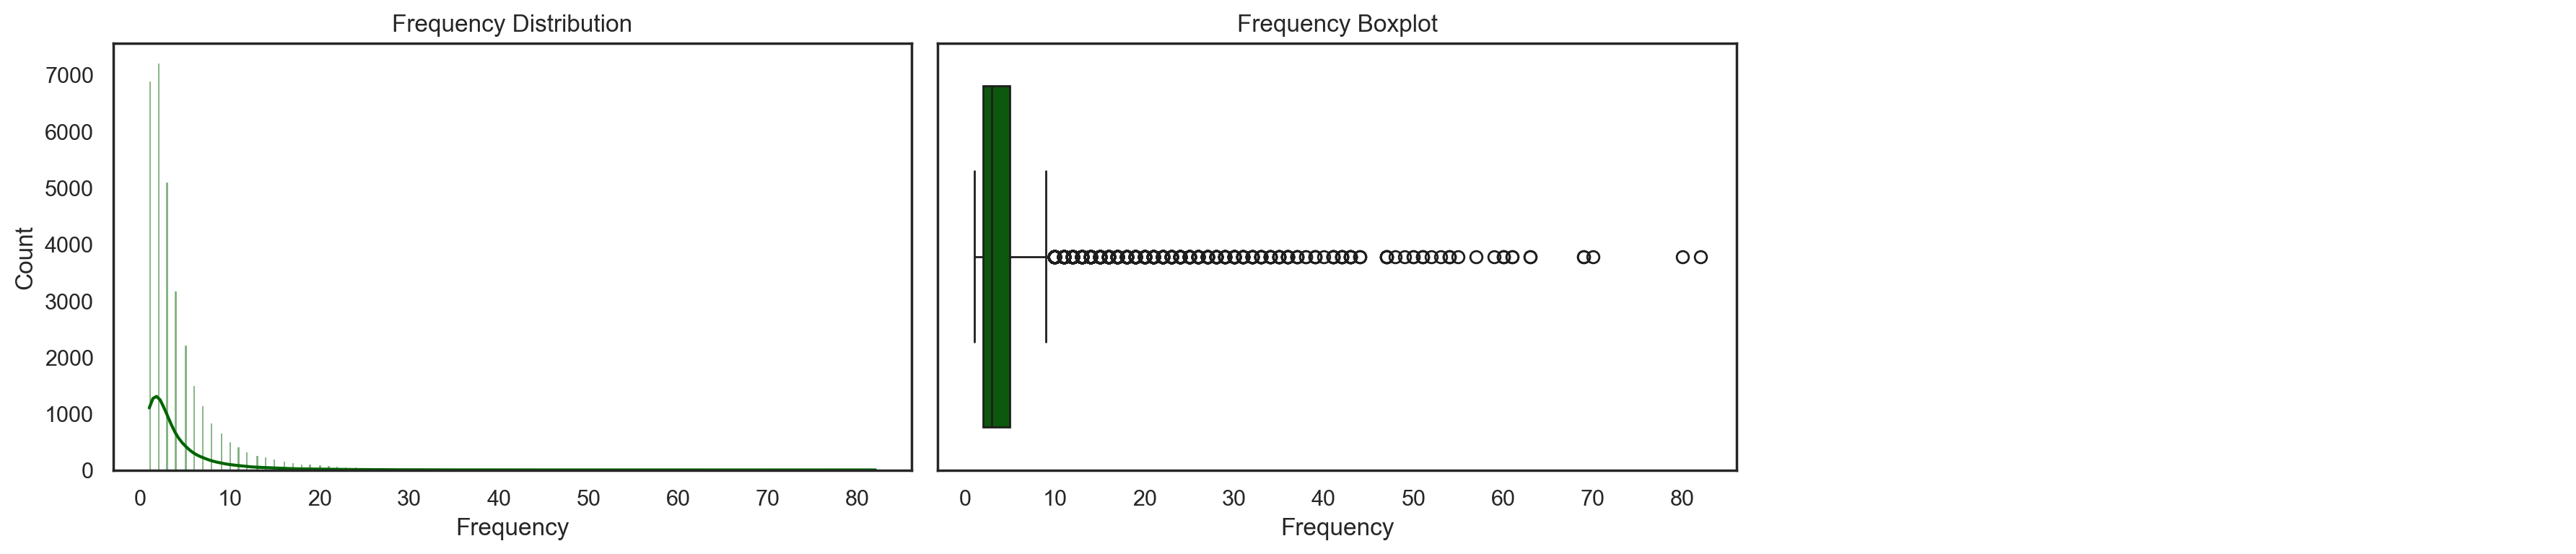

In [125]:
plot_numeric_variable(data=ABCDE_clean, variable="Frequency")

<a class="anchor" id="age">

### 3.5.8. Monetary Spending

</a>

In [126]:
ABCDE_clean["Monetary Spending"]= ABCDE_clean[['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']].sum(axis=1)

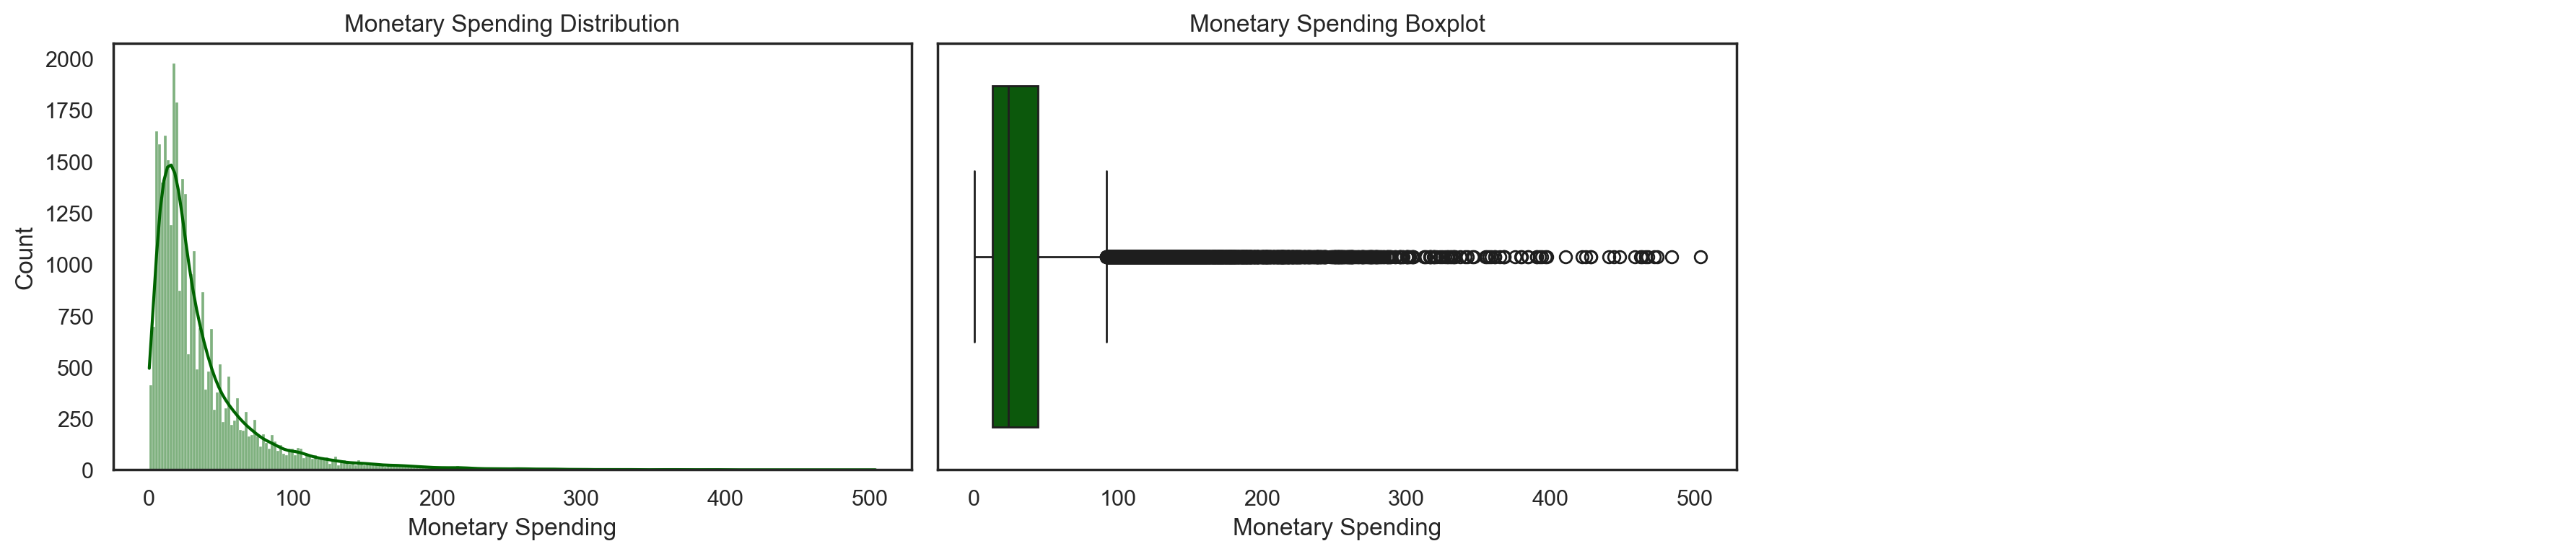

In [127]:
plot_numeric_variable(data=ABCDE_clean, variable="Monetary Spending")

<a class="anchor" id="age">

### 3.5.9. buyer_type

</a>

In [128]:
ABCDE_clean["Engagement Span"] =ABCDE_clean['last_order']-ABCDE_clean['first_order']
# Create a new column to classify customers
ABCDE_clean['buyer_type'] = ABCDE_clean['Engagement Span'].apply(lambda x: 'One-Time Buyer' if x == 0 else 'Repeated Buyer')
ABCDE_clean = ABCDE_clean.drop(columns=["Engagement Span"])

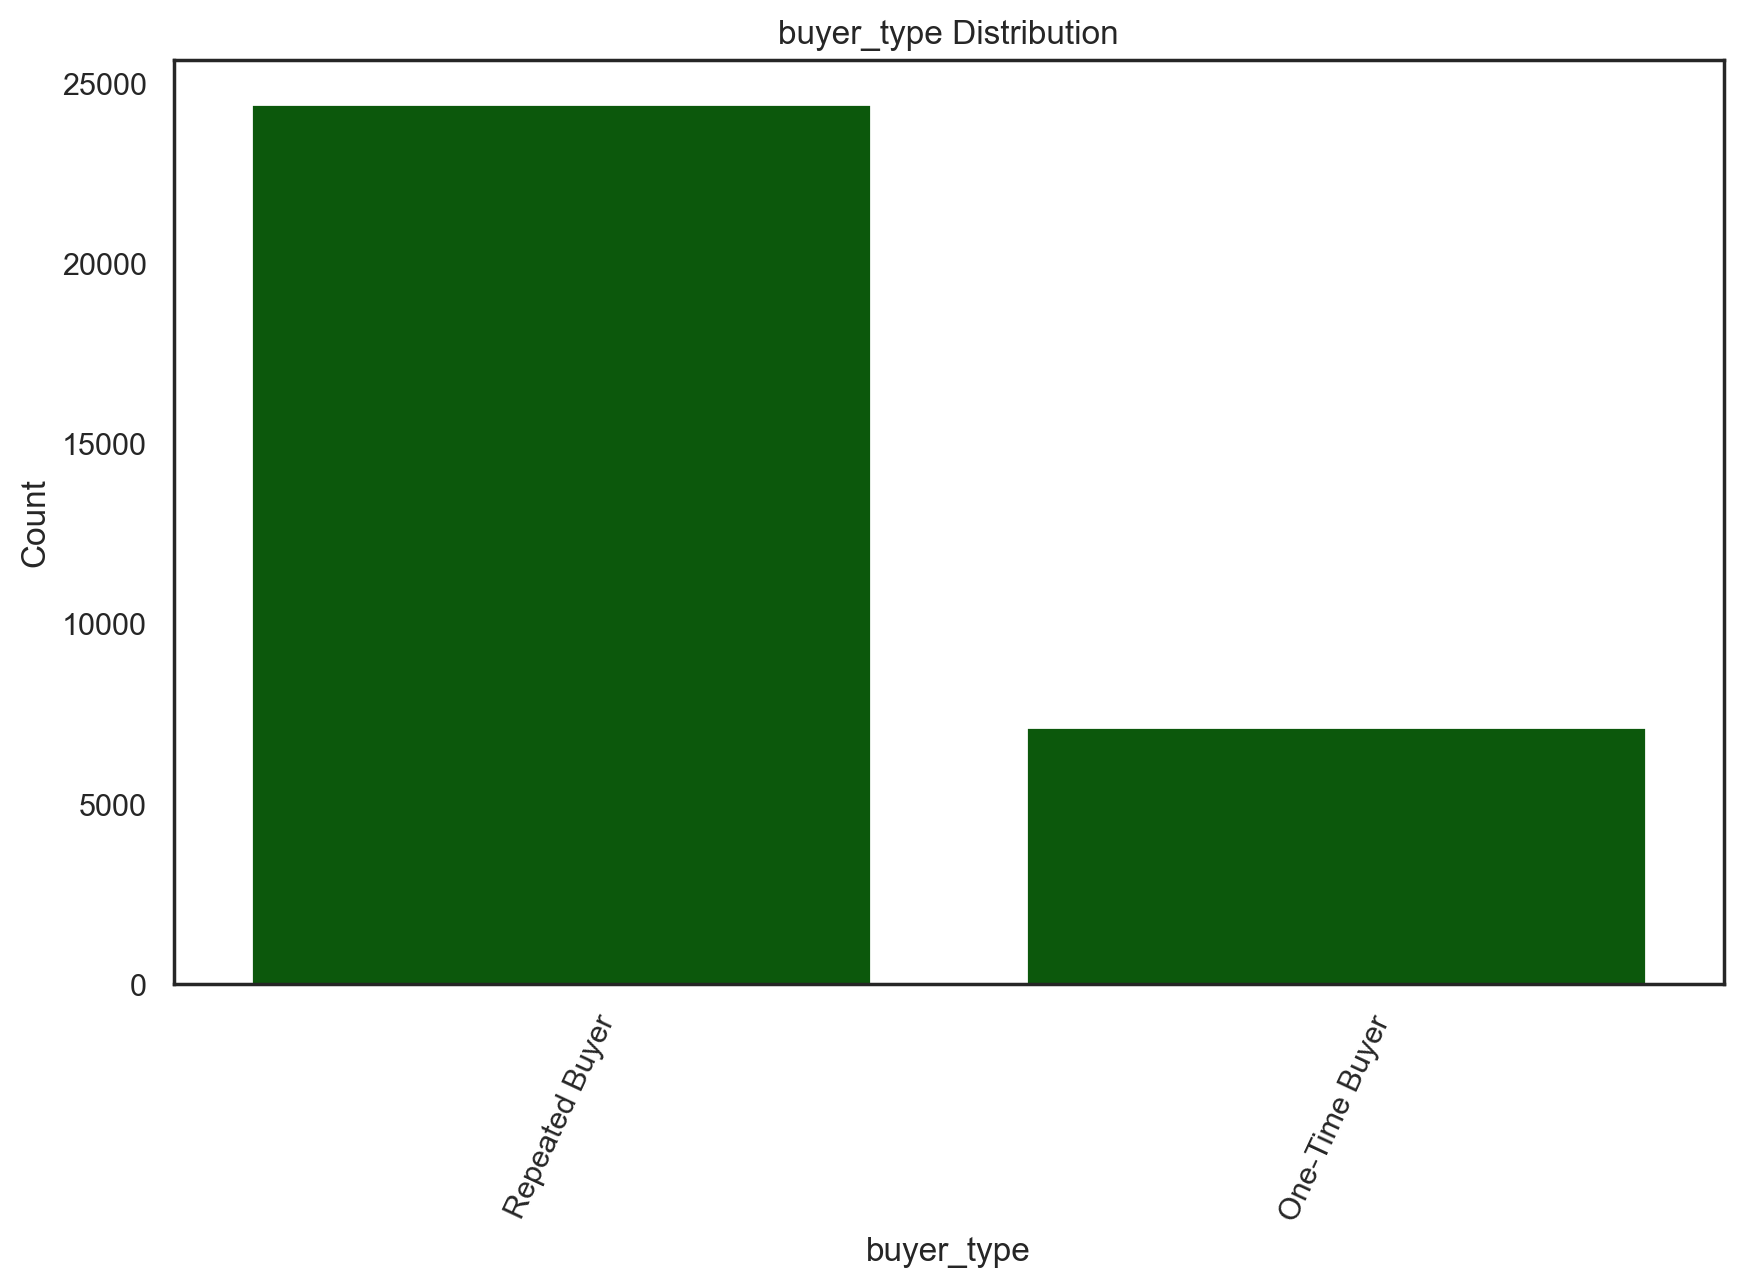

In [129]:
plot_categorical_analysis(data=ABCDE_clean, categorical_var='buyer_type')

<a class="anchor" id="age">

### 3.5.9. Recency

</a>

In [130]:
ABCDE_clean["Recency"] =90-ABCDE_clean['last_order']

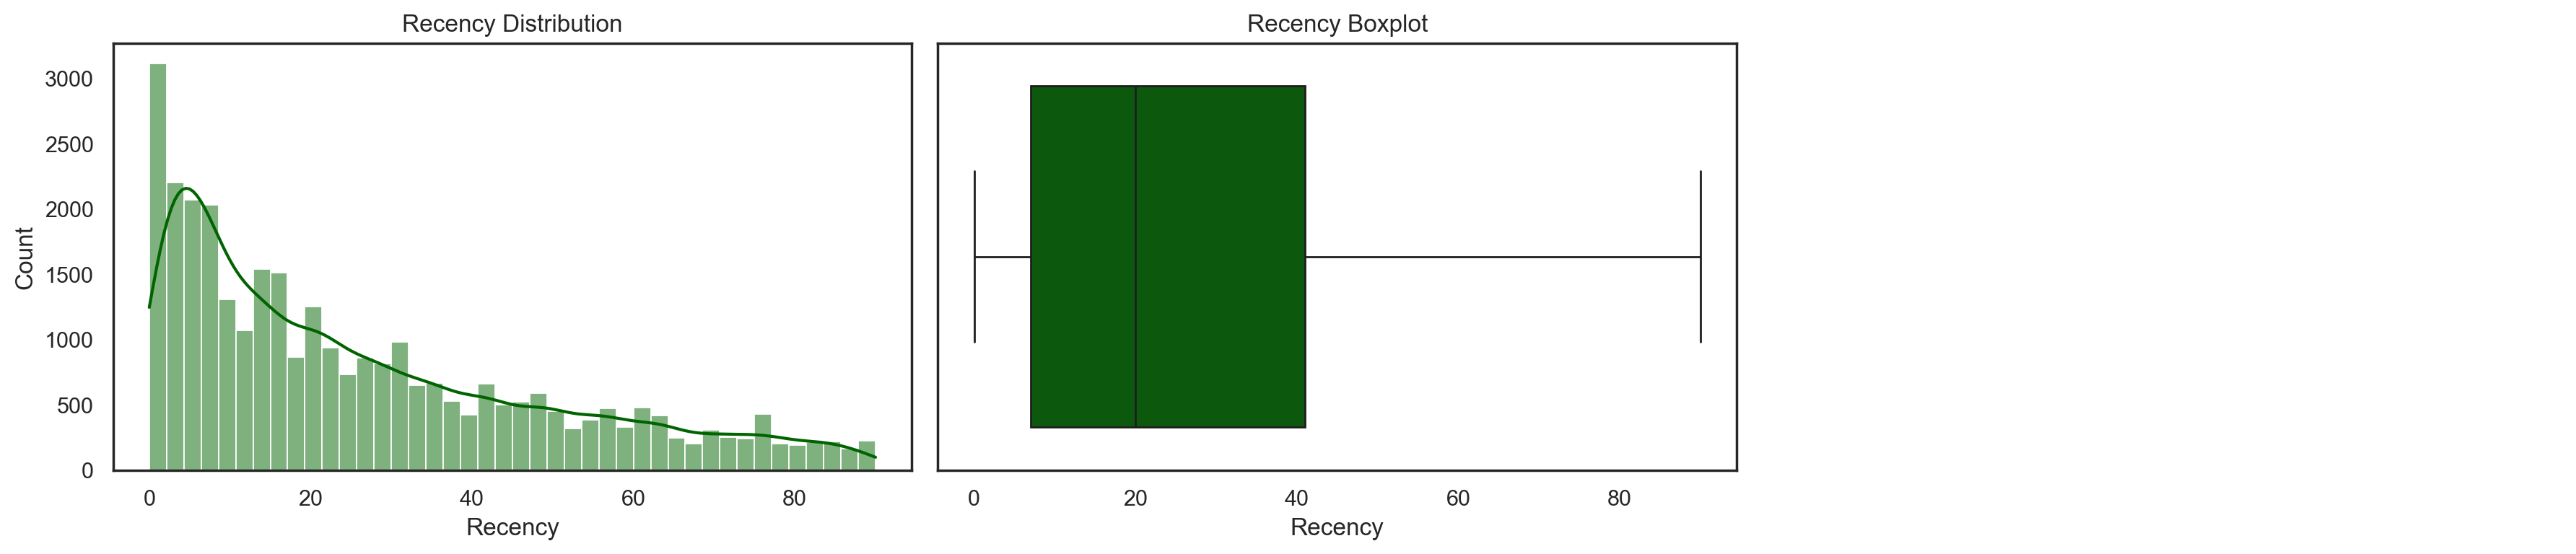

In [131]:
plot_numeric_variable(data=ABCDE_clean, variable="Recency")

<a class="anchor" id="age">

### 3.5.10. Cities

</a>

In [132]:
# Replacing customer_region '-' to '8550'
ABCDE_clean.loc[ABCDE_clean['customer_region'] == '-', 'customer_region'] = '8550'
# Creating feature cities
ABCDE_clean['cities'] = ABCDE_clean['customer_region'].astype(str).str[:1]

In [133]:
ABCDE_clean.groupby(['cities', 'customer_region'], observed=True).agg({'product_count': ['min', 'max', 'mean']})


product_count              
                                 min max      mean
cities customer_region                            
2      2360                        1  97  6.504039
       2440                        1  80  6.252027
       2490                        1  33  5.534989
4      4140                        1  30  4.046893
       4660                        1  94  5.575230
8      8370                        1  22  3.686992
       8550                        1  35  4.670330
       8670                        1  47  4.807515

In [134]:
a = ABCDE_clean.groupby(['cities']).agg({'CUI_Cafe': 'sum','CUI_Asian': 'sum', 'CUI_Chicken Dishes': 'sum',  'CUI_Chinese': 'sum',  'CUI_Desserts': 'sum', 
       'CUI_Healthy': 'sum',  'CUI_Indian': 'sum',  'CUI_Italian': 'sum',  'CUI_Japanese': 'sum', 
       'CUI_Noodle Dishes': 'sum',  'CUI_OTHER': 'sum',  'CUI_Street Food / Snacks': 'sum', 
       'CUI_Thai': 'sum', 'Monetary Spending': 'sum'})
sorted_a = a.apply(lambda x: x.sort_values(ascending=False), axis=1)
sorted_a.loc['Total'] = sorted_a.sum()
sorted_a

,CUI_Asian,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Monetary Spending
cities,,,,,,,,,,,,,,
2,20260.40,2795.38,21419.09,26135.72,4393.32,4486.92,18622.36,7736.27,17401.30,21160.39,42554.19,3989.71,7564.99,242523.19
4,52950.58,22063.06,1848.83,5236.84,18.90,12995.99,31223.99,91930.01,37579.15,0.00,49215.15,6088.67,18528.48,401993.04
8,236619.42,0.00,0.00,12055.34,21387.93,11235.41,0.00,0.00,36041.38,0.00,987.11,108705.63,0.00,532664.59
Total,309830.40,24858.44,23267.92,43427.90,25800.15,28718.32,49846.35,99666.28,91021.83,21160.39,92756.45,118784.01,26093.47,1177180.82


In [135]:
ABCDE_clean.groupby(['cities']).agg({'product_count':['median', 'mean'], 'Monetary Spending':['min','max', 'mean']})

product_count           Monetary Spending                   
              median      mean               min     max       mean
cities                                                             
2                4.0  6.429145              0.37  392.22  22.640328
4                3.0  5.448954              1.12  503.94  38.937722
8                3.0  4.749072              0.47  484.10  50.725130

<a class="anchor" id="age">

### 3.5.11. Combining Cuisines that display similarities from business Perspective

</a>

In [136]:
# Combine cuisines into broader categories
ABCDE_clean['CUI_Asian_Fusion'] = (ABCDE_clean['CUI_Asian'] + 
                                    ABCDE_clean['CUI_Thai'] + 
                                    ABCDE_clean['CUI_Indian'] + 
                                    ABCDE_clean['CUI_Japanese'] + 
                                    ABCDE_clean['CUI_Chinese'] + 
                                    ABCDE_clean['CUI_Noodle Dishes'])

ABCDE_clean['CUI_Western'] = ABCDE_clean['CUI_American'] + ABCDE_clean['CUI_Italian']

ABCDE_clean['CUI_Sweets_and_Beverages'] = (ABCDE_clean['CUI_Beverages'] + 
                                            ABCDE_clean['CUI_Desserts'] + 
                                            ABCDE_clean['CUI_Cafe'])

ABCDE_clean['CUI_Snacks'] = (ABCDE_clean['CUI_Street Food / Snacks'] + 
                                          ABCDE_clean['CUI_Chicken Dishes'])
ABCDE_clean['CUI_HEALTHY']=ABCDE_clean['CUI_Healthy']
# Keep 'CUI_OTHER' as a standalone category
ABCDE_clean['CUI_Other'] = ABCDE_clean['CUI_OTHER']

# Optionally drop individual cuisines after combining
ABCDE_clean = ABCDE_clean.drop(columns=['CUI_Asian', 'CUI_American', 'CUI_Street Food / Snacks',
                                        'CUI_Italian', 'CUI_OTHER', 'CUI_Japanese', 'CUI_Beverages',
                                        'CUI_Indian', 'CUI_Chinese', 'CUI_Healthy', 'CUI_Desserts',
                                        'CUI_Thai', 'CUI_Cafe', 'CUI_Noodle Dishes', 'CUI_Chicken Dishes'])


In [137]:
#ABCDE_clean.drop(columns=["CUI_Asian","CUI_Thai","CUI_Chinese","CUI_Noodle Dishes","CUI_Beverages","CUI_Cafe","CUI_Desserts","CUI_Japanese","CUI_Indian"], inplace=True)

In [138]:
#.columns

In [139]:
#new_cuisines = ['CUI_American', 'CUI_Chicken Dishes', 'CUI_Healthy', 'CUI_Italian',
#       'CUI_OTHER', 'CUI_Street Food / Snacks','CUI_Beverages_and_Desserts']

#for cuisine in new_cuisines:
#plot_numeric_variable(data=ABCDE_clean, variable=cuisine)


<a class="anchor" id="age">

### 3.5.12. Spending Rate

</a>

The Spending Rate is a valuable metric that provides insight into how much a customer spends on average per transaction or interaction. 

In [140]:
#ABCDE_clean['Spending_Rate'] = ABCDE_clean['Monetary Spending'] / ABCDE_clean['Frequency']


In [141]:
#plot_numeric_variable(data=ABCDE_clean, variable="Spending_Rate")

<a class="anchor" id="age">

### 3.5.13. Average products/order

</a>

In [142]:
#ABCDE_clean['Avg_products/order'] = ABCDE_clean['product_count'] / ABCDE_clean['Frequency']


In [143]:
#plot_numeric_variable(data=ABCDE_clean, variable="Avg_products/order")

<a class="anchor" id="age">

### 3.5.14. RFM Score

</a>

In [144]:
# Because my data is composed fof a lot of 1 time buyers 

In [145]:
# Count the number of customers in each frequency group
#frequency_counts = ABCDE_clean['Frequency'].value_counts()
#pd.set_option('display.max_rows', None)  # None to display all rows

# Display the counts
#print(frequency_counts)

Because the distruibution of frequency is vey left skexed with high concetration of one buyers the appo=roacgh of dividing the data by quantile gave error for frequncy that's why we proceed with manual binning for frequency 
We defined bins based on the distribution of frequencies:
- 1: Frequency between 1 and 2.
- 2: Frequency between 3 and 6.
- 3: Frequency between 7 and 15.
- 4: Frequency between 16 and 30.
- 5: Frequency values greater than 30.

In [146]:
#bin_edges = [0, 2, 6, 15, 30, float('inf')]
#bin_labels = ['1', '2', '3', '4', '5']

# Create a new column 'Frequency_Bin' based on manual bins
#ABCDE_clean['F_score'] = pd.cut(ABCDE_clean['Frequency'], bins=bin_edges, labels=bin_labels, right=False)



In [147]:
#ABCDE_clean['F_Score'].value_counts()

In [148]:
# Assign R, F, and M scores
#ABCDE_clean['R_Score'] = pd.qcut(ABCDE_clean['Recency'], q=5, labels=range(5, 0, -1))  # Lower recency is better
#ABCDE_clean['M_Score'] = pd.qcut(ABCDE_clean['Monetary Spending'], q=5, labels=range(1, 6))


In [149]:
#ABCDE_clean['RFM_Score'] = (
#    ABCDE_clean['R_Score'].astype(str) +
#ABCDE_clean['F_Score'].astype(str) +
#    ABCDE_clean['M_Score'].astype(str)
#)


In [150]:
# Define segments based on RFM scores
#def segment_customer(rfm):
#    if rfm in ['555', '554', '545']:
#        return 'Champions'
#    elif rfm.startswith('4') or rfm.startswith('5'):
#        return 'Loyal Customers'
#    elif rfm.endswith('1') or rfm.endswith('2'):
#        return 'At Risk'
#    else:
#        return 'Others'

#ABCDE_clean['Customer_RFM_Segment'] = ABCDE_clean['RFM_Score'].apply(segment_customer)


<a class="anchor" id="age">

## 3.6. Feature Scaling

</a>

#### Standard Scaling

In [151]:
#Creating the metric list
new_metric_features = ABCDE_clean.select_dtypes(include=np.number).columns

In [152]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it (scale the metric features)
ABCDE_scaled = scaler.fit_transform(ABCDE_clean[new_metric_features])

# Convert scaled data into a DataFrame with the same index as the original DataFrame
ABCDE_scaled_df = pd.DataFrame(ABCDE_scaled, columns=new_metric_features, index=ABCDE_clean.index)

# Select the non-metric features from the original data
non_metric_features = ABCDE_clean.drop(columns=new_metric_features)

# Combine the scaled metric features with the non-metric features (ensure no new rows are added)
ABCDE_combined = pd.concat([ABCDE_scaled_df, non_metric_features], axis=1)

<a class="anchor" id="age">

## 3.7. KNN Imputation

</a>

In [153]:
# Initialize the KNN imputer
imputer = KNNImputer()

# Fit and transform the data using KNN imputer (only for the new metric features)
ABCDE_scaled_imputed = imputer.fit_transform(ABCDE_combined[new_metric_features])

# Convert the resulting numpy array back to a pandas DataFrame with the correct column names
ABCDE_scaled_imputed_df = pd.DataFrame(ABCDE_scaled_imputed, columns=new_metric_features, index=ABCDE_combined.index)

# Combine the imputed metric features with the non-metric features
non_metric_features = ABCDE_combined.drop(columns=new_metric_features)
ABCDE_final = pd.concat([ABCDE_scaled_imputed_df, non_metric_features], axis=1)


In [154]:
#### This feature engineerng was intentionally put here sing age was only trated in the previous step

<a class="anchor" id="age">

## 3.8. One Hot Enoding for categorical data for the purpose of profiling

</a>

In [155]:
# Create a copy of the final DataFrame
ABCDE_ohc = ABCDE_final.copy()

# Select categorical features (object and category columns)
categorical_features = ABCDE_ohc.select_dtypes(include=["object", "category"]).columns

# Initialize OneHotEncoder
ohc = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoding to the categorical columns
ohc_feat = ohc.fit_transform(ABCDE_ohc[categorical_features])

# Get the feature names after encoding
ohc_feat_names = ohc.get_feature_names_out(categorical_features)

# Convert the encoded features to a DataFrame
ohc_ABCDE = pd.DataFrame(ohc_feat, index=ABCDE_ohc.index, columns=ohc_feat_names)

# Concatenate the new DataFrame with the original one
ABCDE_ohc = pd.concat([ABCDE_ohc, ohc_ABCDE], axis=1)

# Update the final DataFrame
ABCDE_final = ABCDE_ohc.copy()
# Dropping categorical Variables
ABCDE_final = ABCDE_final.drop(columns=['customer_region', 'last_promo', 'payment_method', 'buyer_type', 'cities'])


<a class="anchor" id="age">

## 3.9. DBSCAN Multivariate Outliers

</a>

#### Using a K-Distance Plot to Find epsilon

In [156]:
ABCDE_final[new_metric_features].shape

(31537, 21)

- MinPts: As a rule of thumb, minPts = 2 x dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.
so minPts = 23*2 =46
- ε: The value for ε can then be chosen by using a k-distance graph, plotting the distance to the kth (k = minPts - 1) nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an "elbow": if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. so k=45

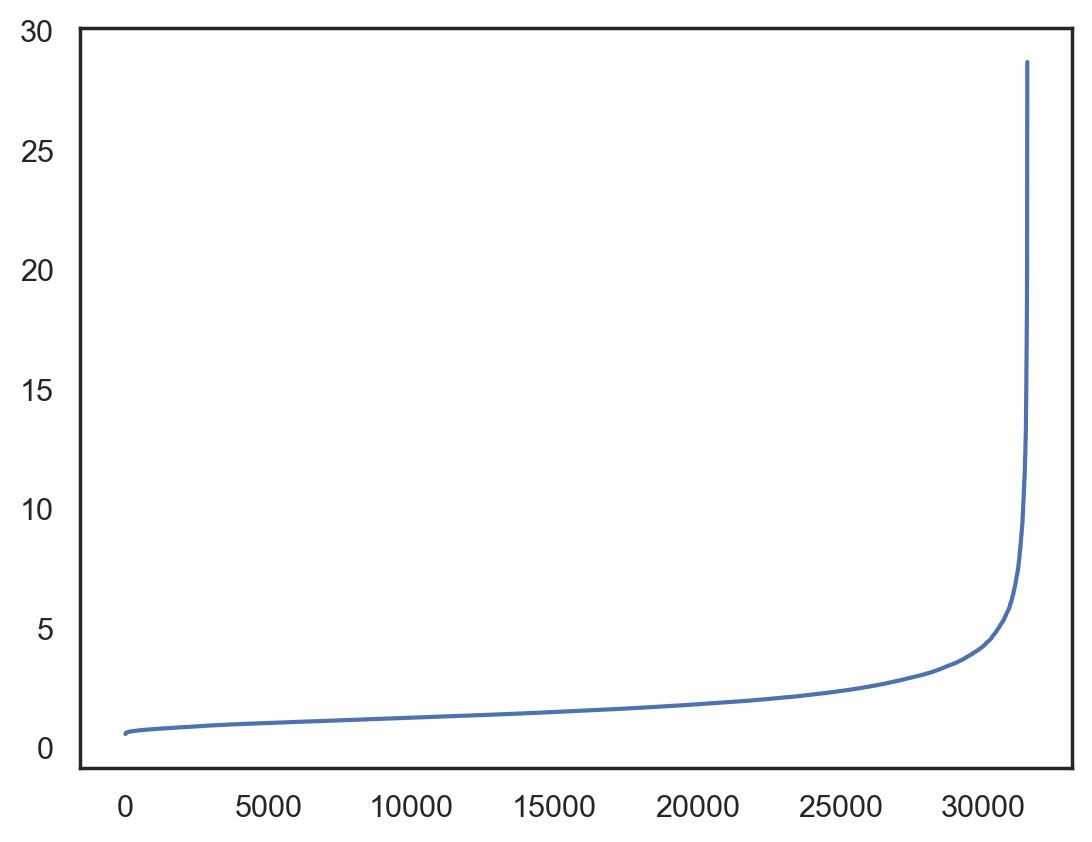

In [157]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=41)
neigh.fit(ABCDE_final[new_metric_features])
distances, _ = neigh.kneighbors(ABCDE_final[new_metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

From the graph we can notice that the elbow is around 5 so we can assume that 5 is epsilon

In [158]:
# Based on the hyperparameters found in the previous class
dbscan = DBSCAN(eps=6, min_samples=41, n_jobs=4)
dbscan_labels = dbscan.fit_predict(ABCDE_final[new_metric_features])
Counter(dbscan_labels)

Counter({0: 31277, -1: 260})

In [159]:
# Save the detected outliers (-1 indicates outliers)
ABCDE_out = ABCDE_final[dbscan_labels == -1].copy()

# Remove outliers from the main DataFrame
ABCDE_final = ABCDE_final[dbscan_labels != -1].copy()

<a class="anchor" id="age">

# 4. Feature Selection

</a>

### Correlation Matrix of New Numeric Features


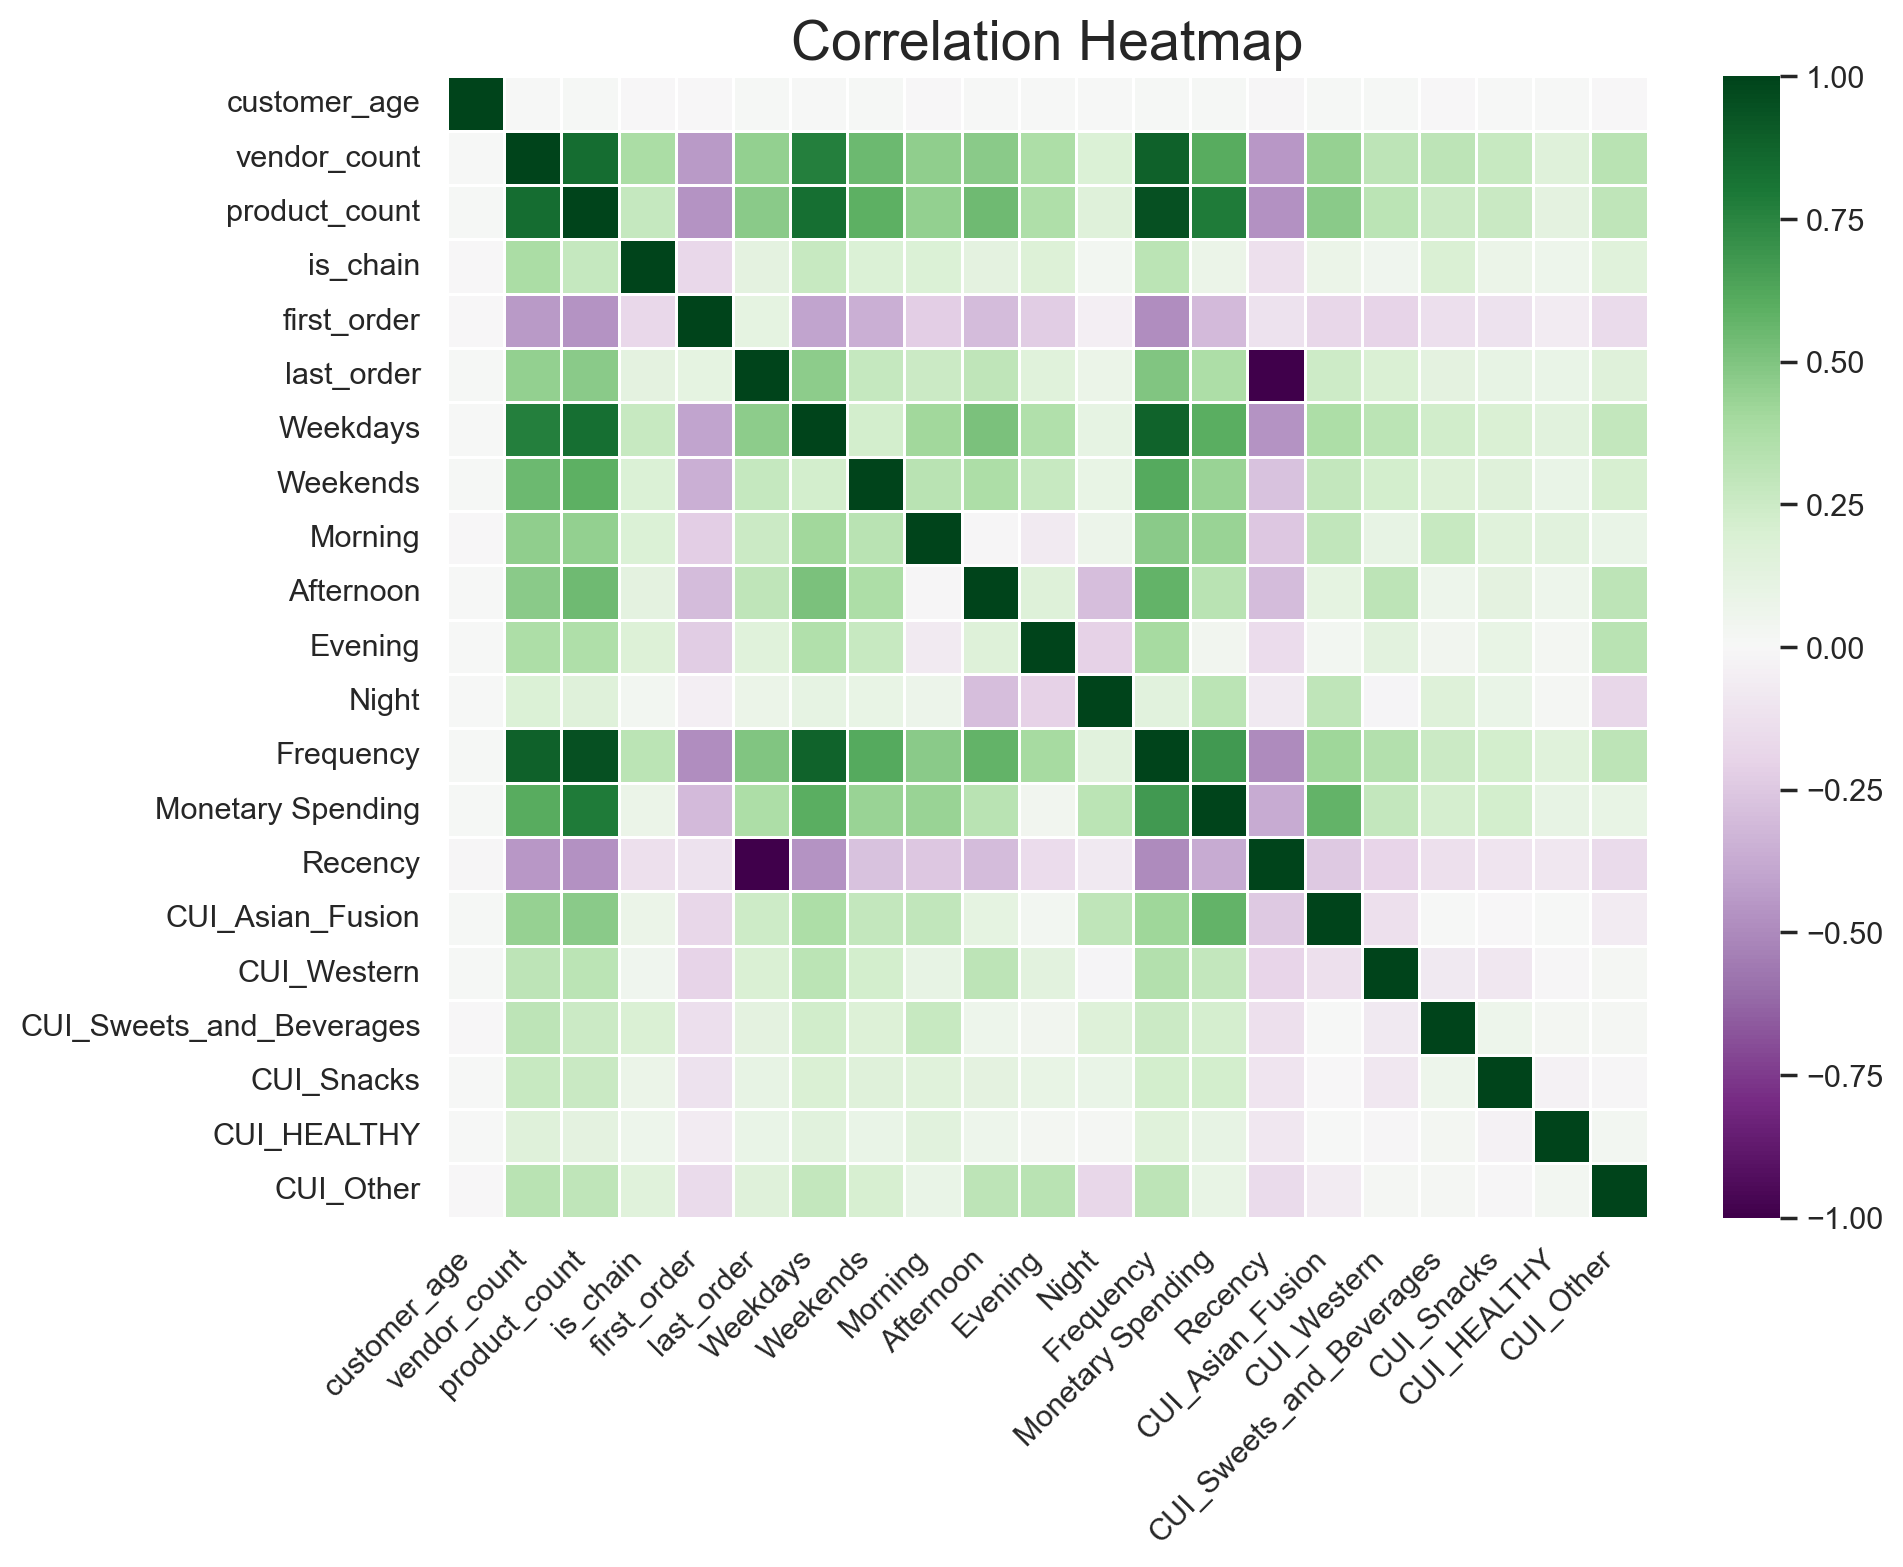

In [160]:


fig = plt.figure(figsize=(10, 8))

#Obtain correlation matrix. 
corr = ABCDE_final[new_metric_features].corr(method="spearman")
#Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=False, cmap='PRGn', cbar=True, square=False, linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  

#Display the results
plt.show()

#### Checking for multicullinearity

In [161]:
import pandas as pd

# Assuming 'ABCDE_scaled' is your DataFrame
# Subset the relevant columns and calculate the correlation matrix
correlation_matrix = ABCDE_final[new_metric_features].corr()

# Round the correlation matrix to 2 decimal places
rounded_matrix = correlation_matrix.round(2)

# Highlight values above 0.8 by replacing them with a string
highlighted_matrix = rounded_matrix.applymap(lambda x: f"**{x:.2f}**" if x > 0.8 and x != 1.0 else f"{x:.2f}")

# Display the highlighted matrix
print(highlighted_matrix)


                         customer_age vendor_count product_count is_chain  \
customer_age                     1.00         0.00          0.01     0.00   
vendor_count                     0.00         1.00      **0.85**     0.29   
product_count                    0.01     **0.85**          1.00     0.21   
is_chain                         0.00         0.29          0.21     1.00   
first_order                      0.00        -0.39         -0.39    -0.19   
last_order                       0.01         0.38          0.39     0.13   
Weekdays                         0.00     **0.81**      **0.91**     0.22   
Weekends                         0.01         0.66          0.73     0.18   
Morning                          0.00         0.55          0.59     0.16   
Afternoon                        0.01         0.58          0.71     0.13   
Evening                          0.00         0.52          0.56     0.15   
Night                            0.00         0.24          0.21     0.06   

C:\Users\user\AppData\Local\Temp\ipykernel_11456\3459165656.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  highlighted_matrix = rounded_matrix.applymap(lambda x: f"**{x:.2f}**" if x > 0.8 and x != 1.0 else f"{x:.2f}")


We set a threshold of 0.8 as a high correlation indicator here is the list of features that are highly correlated:
- product_count and vendor_count 0.85
- vendor_count and weekdays 0.82
- vendor_count and Frequency 0.86
- product_count and weekdays 0.93
- product_count and Frequency 0.97
- product_count and monetary_spending 0.81
- weekdays and Frequency 0.96
- Weekend and Frequency 0.80

So from these observations since vendor_count and product_count are highly correlated with many variables we decided not to include them in the perspective
Also since frequency is highly correlated with weekends and weekday and we want to capture the pattern frequency of customers during weekdays or weekends we will also not include frequency

Also since customer_age has no correlation with any warkibale we will tret it as not errelevant and we will not include it in clustering

In [162]:
ABCDE_final.drop(columns=["product_count","vendor_count","Frequency","customer_age"], inplace=True)


<a class="anchor" id="age">

# 5. Clustering

</a>

**Models that will be used:**
- Hierarchical Clustering
- K-means 
- SOMs
- DBSCAN


**Suggested Perspectives:**

1. Value/ Brhavior-Based Segmentation: Group customers based on their economic value, spending patterns and purchasing habits.

In [164]:
ABCDE_VB = ABCDE_final[["Monetary Spending", "Recency", "Weekdays", "Weekends", "Morning", "Afternoon", "Evening","Night"]]

2. Preference-Based Segmentation: Group customers based on their cuisine preferences:

In [165]:
ABCDE_PB = ABCDE_final[['CUI_Asian_Fusion', 'CUI_Western',
       'CUI_Sweets_and_Beverages', 'CUI_Snacks', 'CUI_HEALTHY', 'CUI_Other']]

<a class="anchor" id="age">

## 5.1 Behavior-Based Segmentation

</a>

<a class="anchor" id="age">

### 5.1.1 K-means and Hierarchical clustering

</a>

In [166]:
# Set up the clusterers
kmeans = KMeans(init='k-means++', n_init=20, random_state=42)
hc_methods = ["ward", "complete", "average", "single"]

In [167]:
def get_ss(df, feats):
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    return ss 

def get_ssb(df, feats, label_col):
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))))
    ssb = np.sum(ssb_i)
    return ssb

def get_ssw(df, feats, label_col):
    feats_label = feats + [label_col]
    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), include_groups=False)
    return df_k.sum()




In [168]:
def get_rsq(df, feats, label_col):
    df_sst_ = get_ss(df, feats)
    df_ssw_ = get_ssw(df, feats, label_col)
    df_ssb_ = df_sst_ - df_ssw_
    return (df_ssb_ / df_sst_)

In [169]:
def get_r2_scores(df, feats, clusterer, min_k=2, max_k=10):
    r2_clust = {}
    for n in range(min_k, max_k + 1):  # Ensure max_k is included
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df[feats])  # Use only the features
        df_concat = pd.concat([df, pd.Series(labels, name='labels', index=df.index)], axis=1)
        r2_clust[n] = get_rsq(df_concat, feats, 'labels')
    return r2_clust


**Finding the optimal clusterer on Behavioral variables using Elbow Hierarchical Method:**

In [170]:
# Obtaining the R² scores for each cluster solution on demographic variables
# This may take some time to run
feats_VB= ["Monetary Spending", "Recency", "Weekdays", "Weekends", "Morning", "Afternoon", "Evening","Night"]

r2_scores_VB = {}

# Get KMeans R² scores
r2_scores_VB['kmeans'] = get_r2_scores(ABCDE_VB, feats_VB, kmeans)

# Get R² scores for hierarchical clust
ering methods
for link in hc_methods:
    hierarchical = AgglomerativeClustering(linkage=link, metric='euclidean')
    r2_scores_VB[link] = get_r2_scores(ABCDE_VB, feats_VB, hierarchical)

In [171]:
r2_scores_VB = pd.DataFrame(r2_scores_VB)

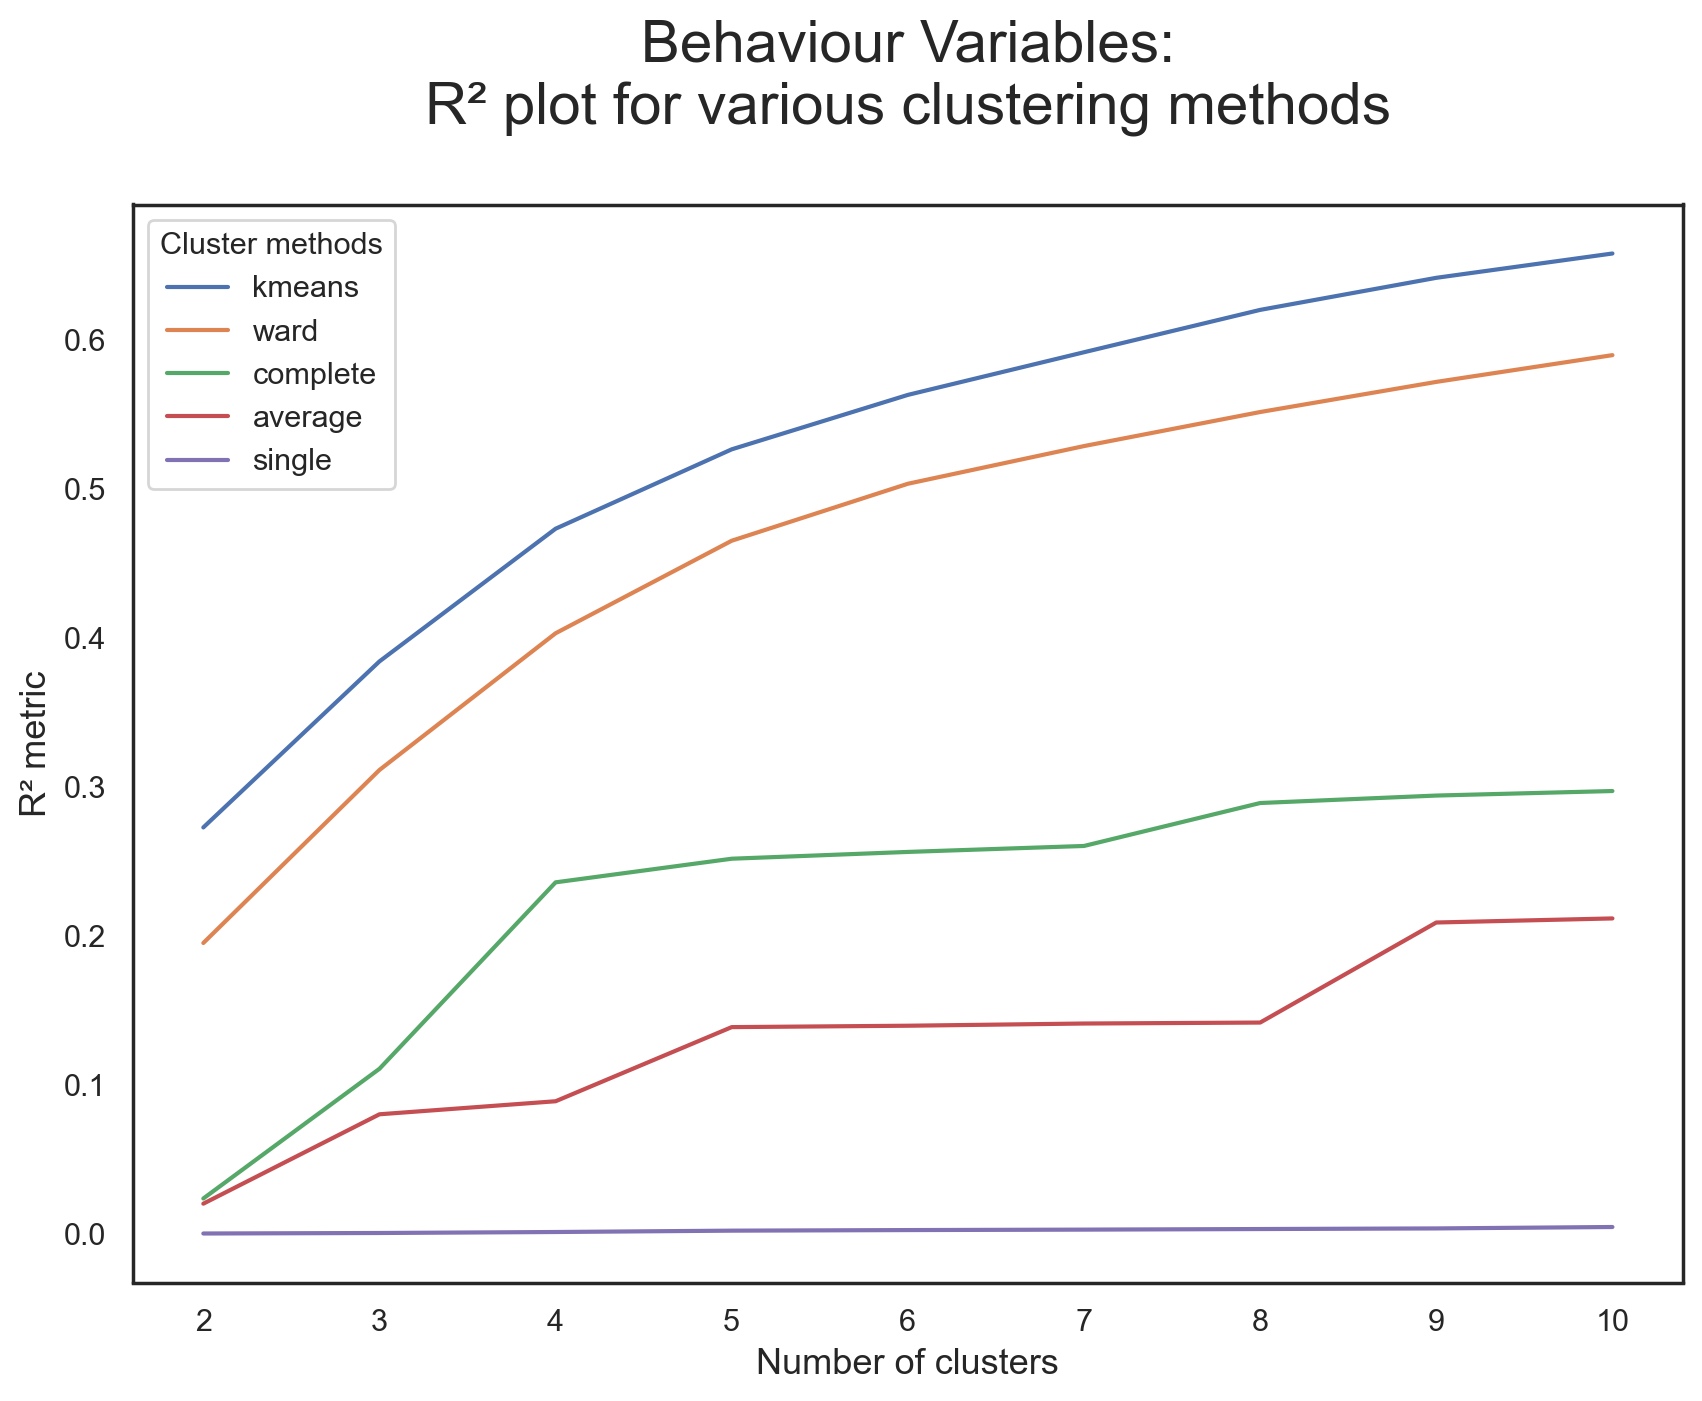

In [172]:
# Visualizing the R² scores for each cluster solution on demographic variables
r2_scores_VB.plot.line(figsize=(10,7))

plt.title("Behaviour Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

**Finding the optimal clusterer on Behavioral variables using Inertia and Silohette:**

In [173]:
def inertia_and_silhouette_plots(X, min_clusters, max_clusters):
    inertias = []
    silhouette_scores = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)

        # Silhouette score is undefined for k=1
        if k > 1:
            silhouette_scores.append(silhouette_score(X, labels))
        else:
            silhouette_scores.append(float('nan'))  # Append NaN for k=1

    # Plotting
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(np.arange(min_clusters, max_clusters + 1), inertias, marker='o', color=color, label='Inertia')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(np.arange(min_clusters, max_clusters + 1), silhouette_scores, marker='o', color=color, label='Silhouette Score')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()


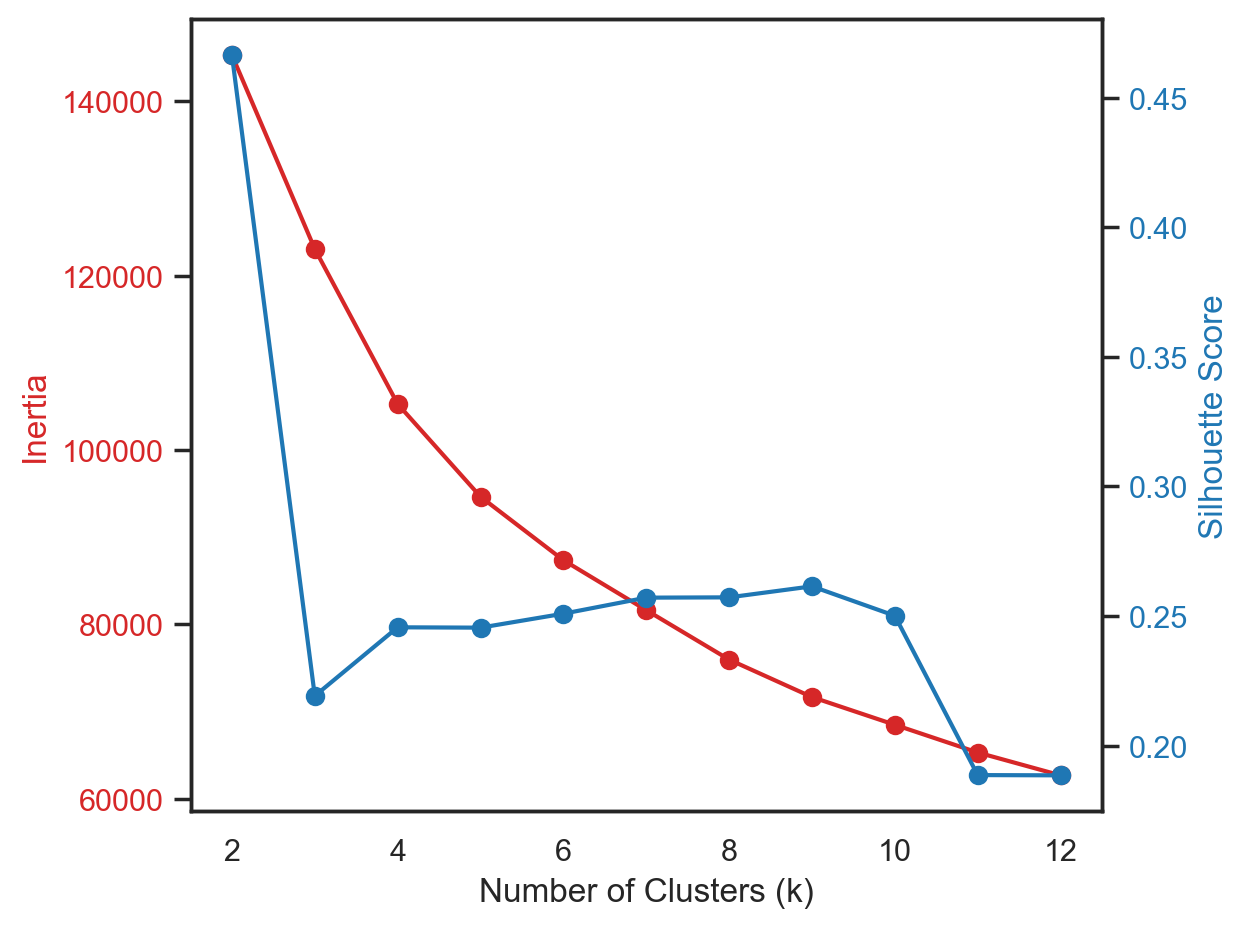

In [174]:
inertia_and_silhouette_plots(ABCDE_VB,2,12)

**K-Means with 4 Clusters seems like the best option**

In [175]:
# Creating a copy of the financial dataframe for K-Means clustering
ABCDE_VB_KM = ABCDE_VB.copy()

# Applying K-Means clustering with 4 clusters
kmeans_model = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
ABCDE_VB_KM['cluster_labels_VB'] = kmeans_model.fit_predict(ABCDE_VB)

# Calculating the mean values for each cluster
cluster_means = ABCDE_VB_KM.groupby('cluster_labels_VB').mean()
cluster_means


,Monetary Spending,Recency,Weekdays,Weekends,Morning,Afternoon,Evening,Night
cluster_labels_VB,,,,,,,,
0,1.481206,-0.580371,0.561297,0.469477,0.534598,-0.362737,-0.319994,2.646726
1,-0.455510,1.349543,-0.500527,-0.408974,-0.338420,-0.402184,-0.255956,-0.195286
2,1.211789,-0.772724,1.829766,1.590217,1.001917,1.796254,1.462124,-0.242197
3,-0.209309,-0.484771,-0.184013,-0.171480,-0.120714,-0.099589,-0.107107,-0.192752


<a class="anchor" id="age">

### 5.1.2 Self-organizing Map

</a>

In [ ]:
################### Add code here for self organizing Map applied on First Perspective #######################################

<a class="anchor" id="age">

### 5.1.3 DBSCAN

</a>

In [ ]:
################## Add code here for DBSCAN applied on First Perspective #########################################

<a class="anchor" id="age">

### 5.1.4 Comparing Models for Behaviour Perspective

</a>

In [176]:
def get_ss_(df):

    return np.sum(df.var(ddof=0) * (df.count() - 1))  # ddof=0 for population variance

def r2(df, labels):

    sst = get_ss_(df)  # Total sum of squares
    ssw = np.sum(df.groupby(labels).apply(get_ss_))  # Within-cluster sum of squares
    return 1 - ssw / sst

def compare_models(models_dict, cluster_column='cluster_labels'):
    scores = []
    n_clusters = []
    
    model_names = list(models_dict.keys())
    
    for modelName, modelDataframe in models_dict.items():
        scores.append(r2(modelDataframe, cluster_column))
        n_clusters.append(len(np.unique(modelDataframe[cluster_column])))
        
    sns.set()
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_size_inches(22.2, 15)  # Increase figure size by 20%
    
    x = np.arange(len(scores))  # the label locations
    
    width = 0.20  # the width of the bars
    
    ax1.set_facecolor("white")
    for i, (score, model_name) in enumerate(zip(scores, model_names)):
        ax1.bar(x[i] - width/2, score, width, label=model_name)
    
    ax1.set_ylim(0.0, 1.0)
    ax1.set_ylabel('Scores', fontsize=18)  # Increase font size for the ylabel
    ax1.set_title('R-Squared score by Model', fontsize=20)  # Increase font size for the title
    ax1.set_xticks(x)
    ax1.set_xticklabels([])
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)  # Increase font size for the legend
    
    ax2.set_facecolor("white")
    for i, (cluster, model_name) in enumerate(zip(n_clusters, model_names)):
        ax2.bar(x[i] - width/2, cluster, width, label=model_name)
    
    ax2.set_ylabel('Clusters', fontsize=18)  # Increase font size for the ylabel
    ax2.set_title('Number of Clusters by Model', fontsize=20)  # Increase font size for the title
    ax2.set_xticks(x)
    ax2.set_xticklabels([])
    ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)  # Increase font size for the legend
    
    plt.show()


In [177]:
Behavioral_models = {
    "KMeans": ABCDE_VB_KM,
#    "SOMs": ABCDE_VB_SOM, #Once you finish clustering add your code here
#    "DBSCAN": ABCDE_VB_DBSCAN,

}

C:\Users\user\AppData\Local\Temp\ipykernel_11456\1903578785.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw = np.sum(df.groupby(labels).apply(get_ss_))  # Within-cluster sum of squares


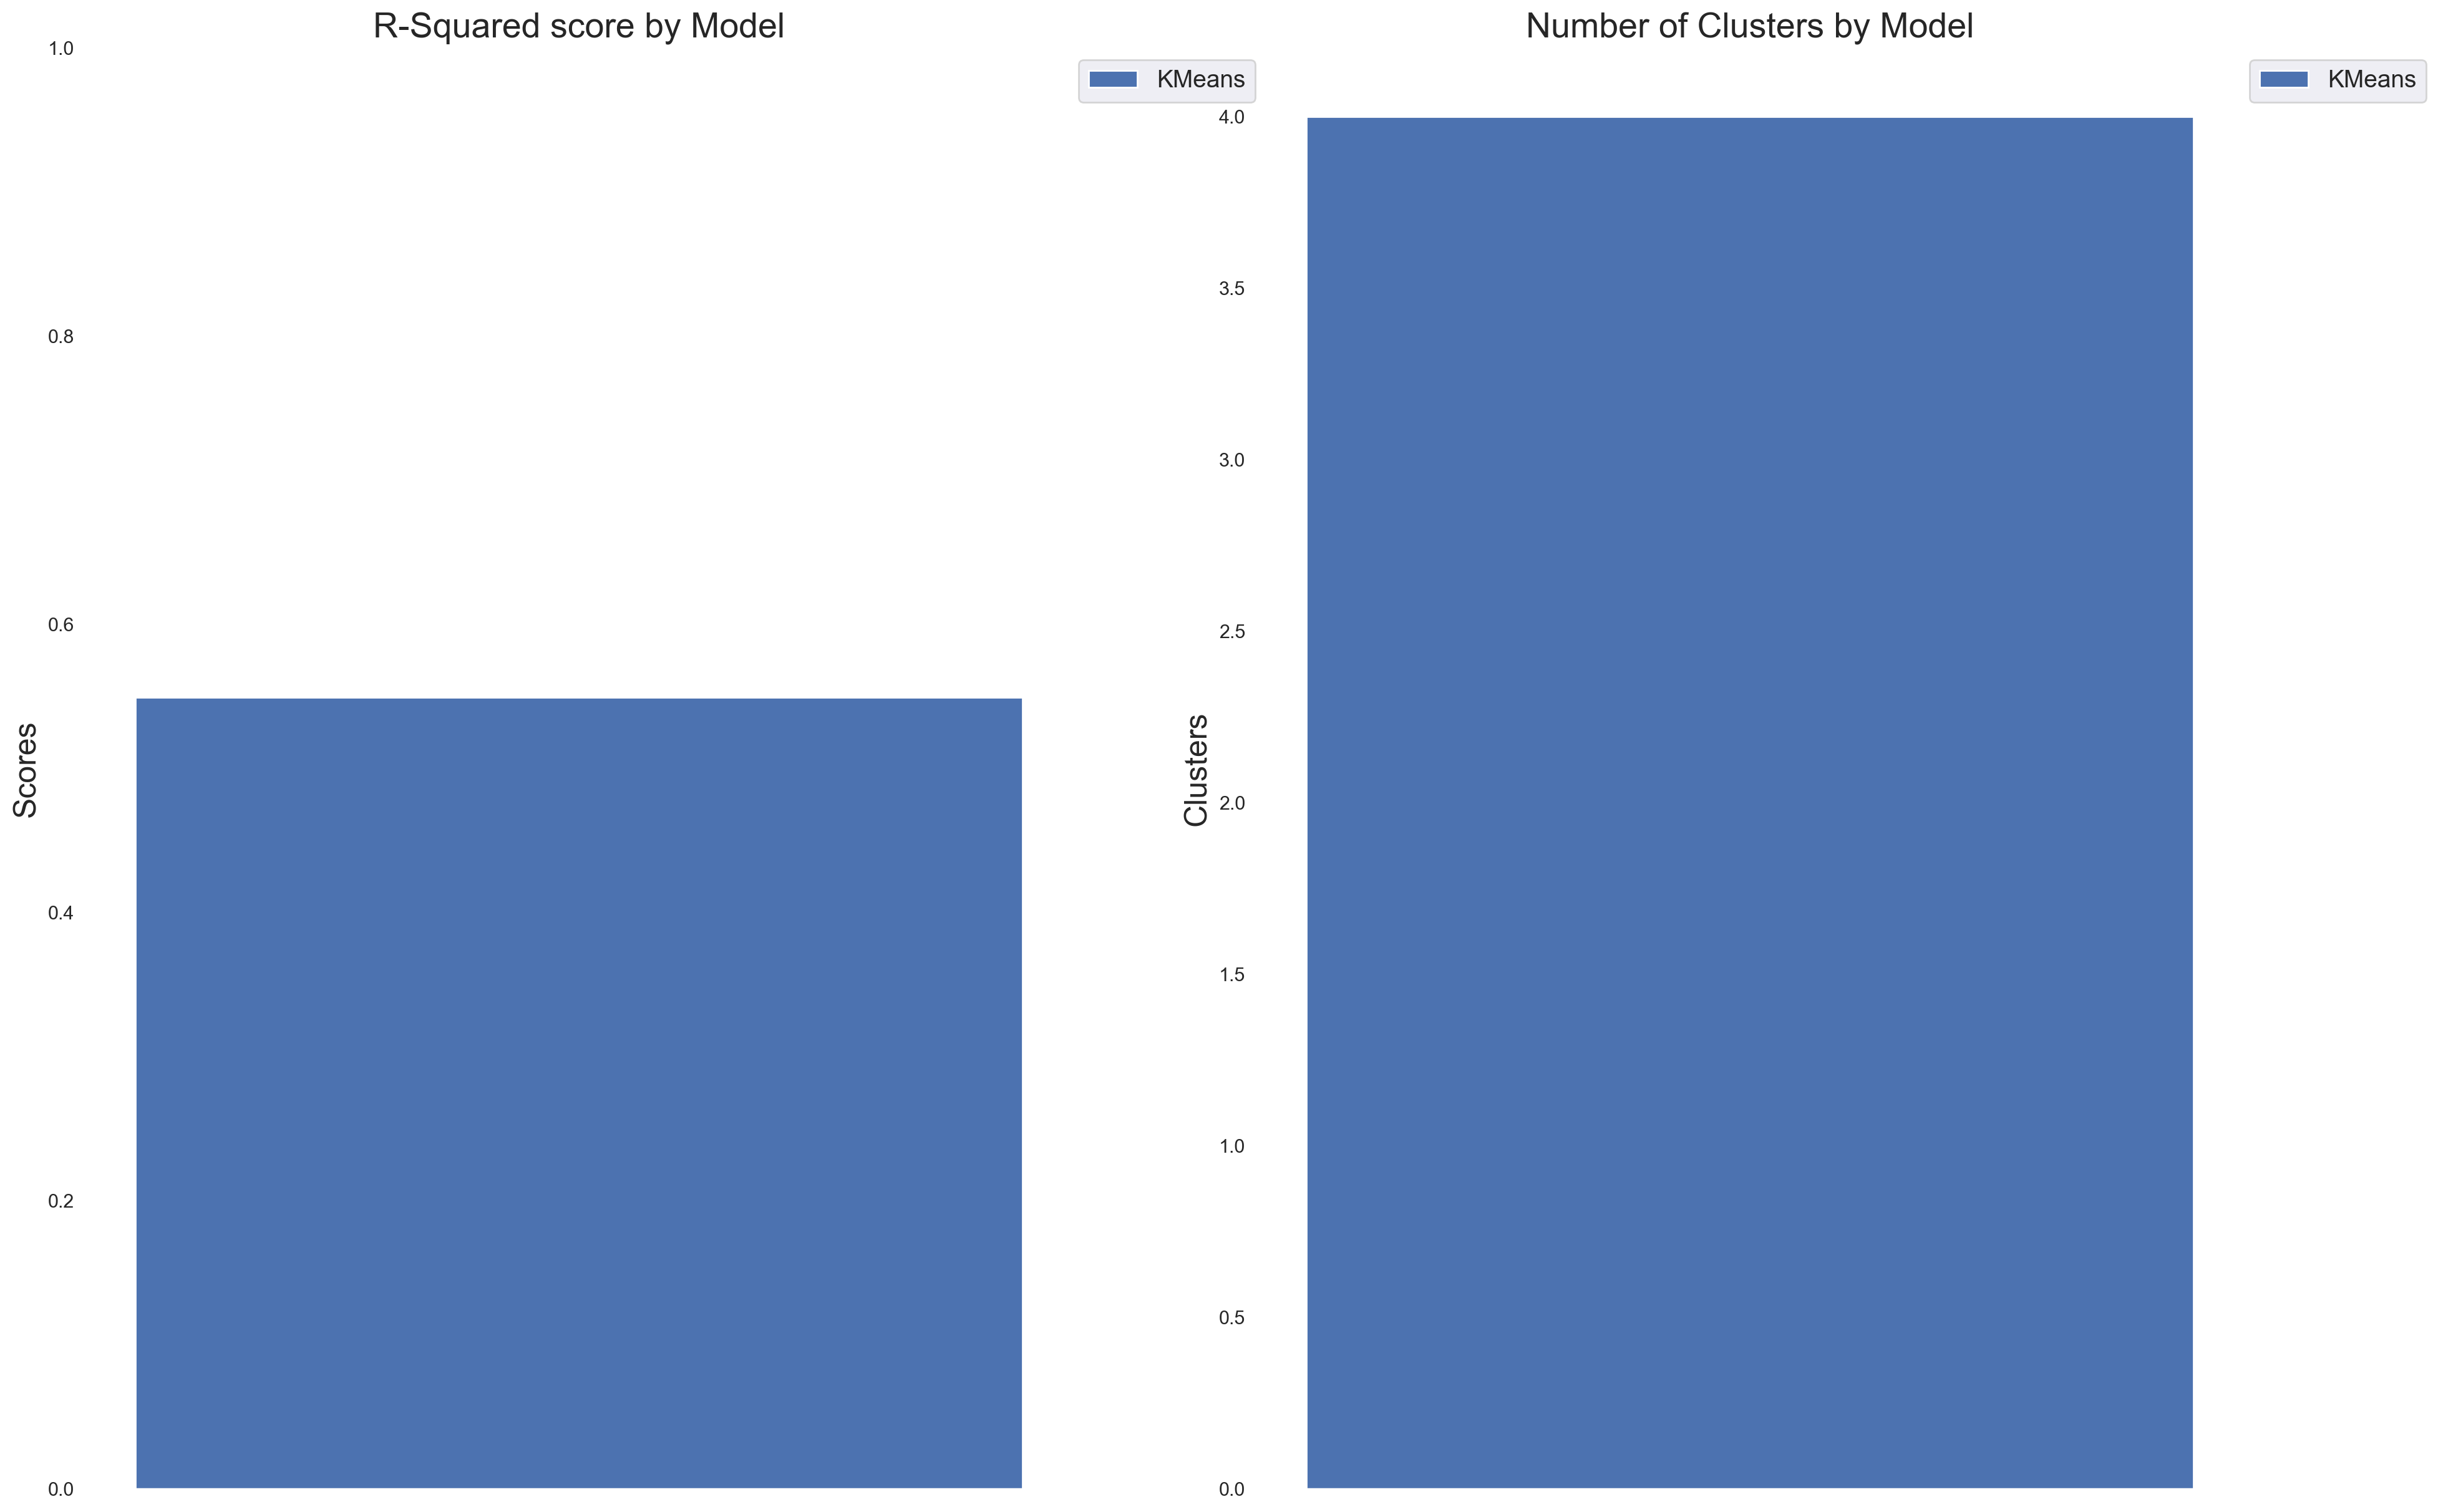

In [178]:
Preference_models = {
    "KMeans": ABCDE_VB_KM,
    # "SOMs": ABCDE_VB_SOM, # Add SOM clustering results when available
    # "DBSCAN": ABCDE_VB_DBSCAN, # Add DBSCAN results when available
}

# Assuming compare_models is a function defined elsewhere, we call it with the correct parameters
compare_models(Preference_models, cluster_column="cluster_labels_VB")

<a class="anchor" id="age">

## 5.2 Perspective-Based Segmentation

</a>

<a class="anchor" id="age">

### 5.2.1 K-means and Hierarchical clustering

</a>

**Finding the optimal clusterer on Behavioral variables using Elbow Hierarchical Method:**

In [179]:
##########################################
# THIS TAKES A FEW MINUTES TO RUN!!
##########################################
feats_PB = ['CUI_Asian_Fusion', 'CUI_Western',
       'CUI_Sweets_and_Beverages', 'CUI_Snacks', 'CUI_HEALTHY', 'CUI_Other']
# Assuming ABCDE_PB is the DataFrame and feats_PB is the list of features
r2_scores_PB = {}

# Get KMeans R² scores
r2_scores_PB['kmeans'] = get_r2_scores(ABCDE_PB, feats_PB, kmeans)

# Get R² scores for hierarchical clustering methods+3210

for link in hc_methods:
    hierarchical = AgglomerativeClustering(linkage=link, metric='euclidean')
    r2_scores_PB[link] = get_r2_scores(ABCDE_PB, feats_PB, hierarchical)

In [180]:
r2_hc_PB = pd.DataFrame(r2_scores_PB)

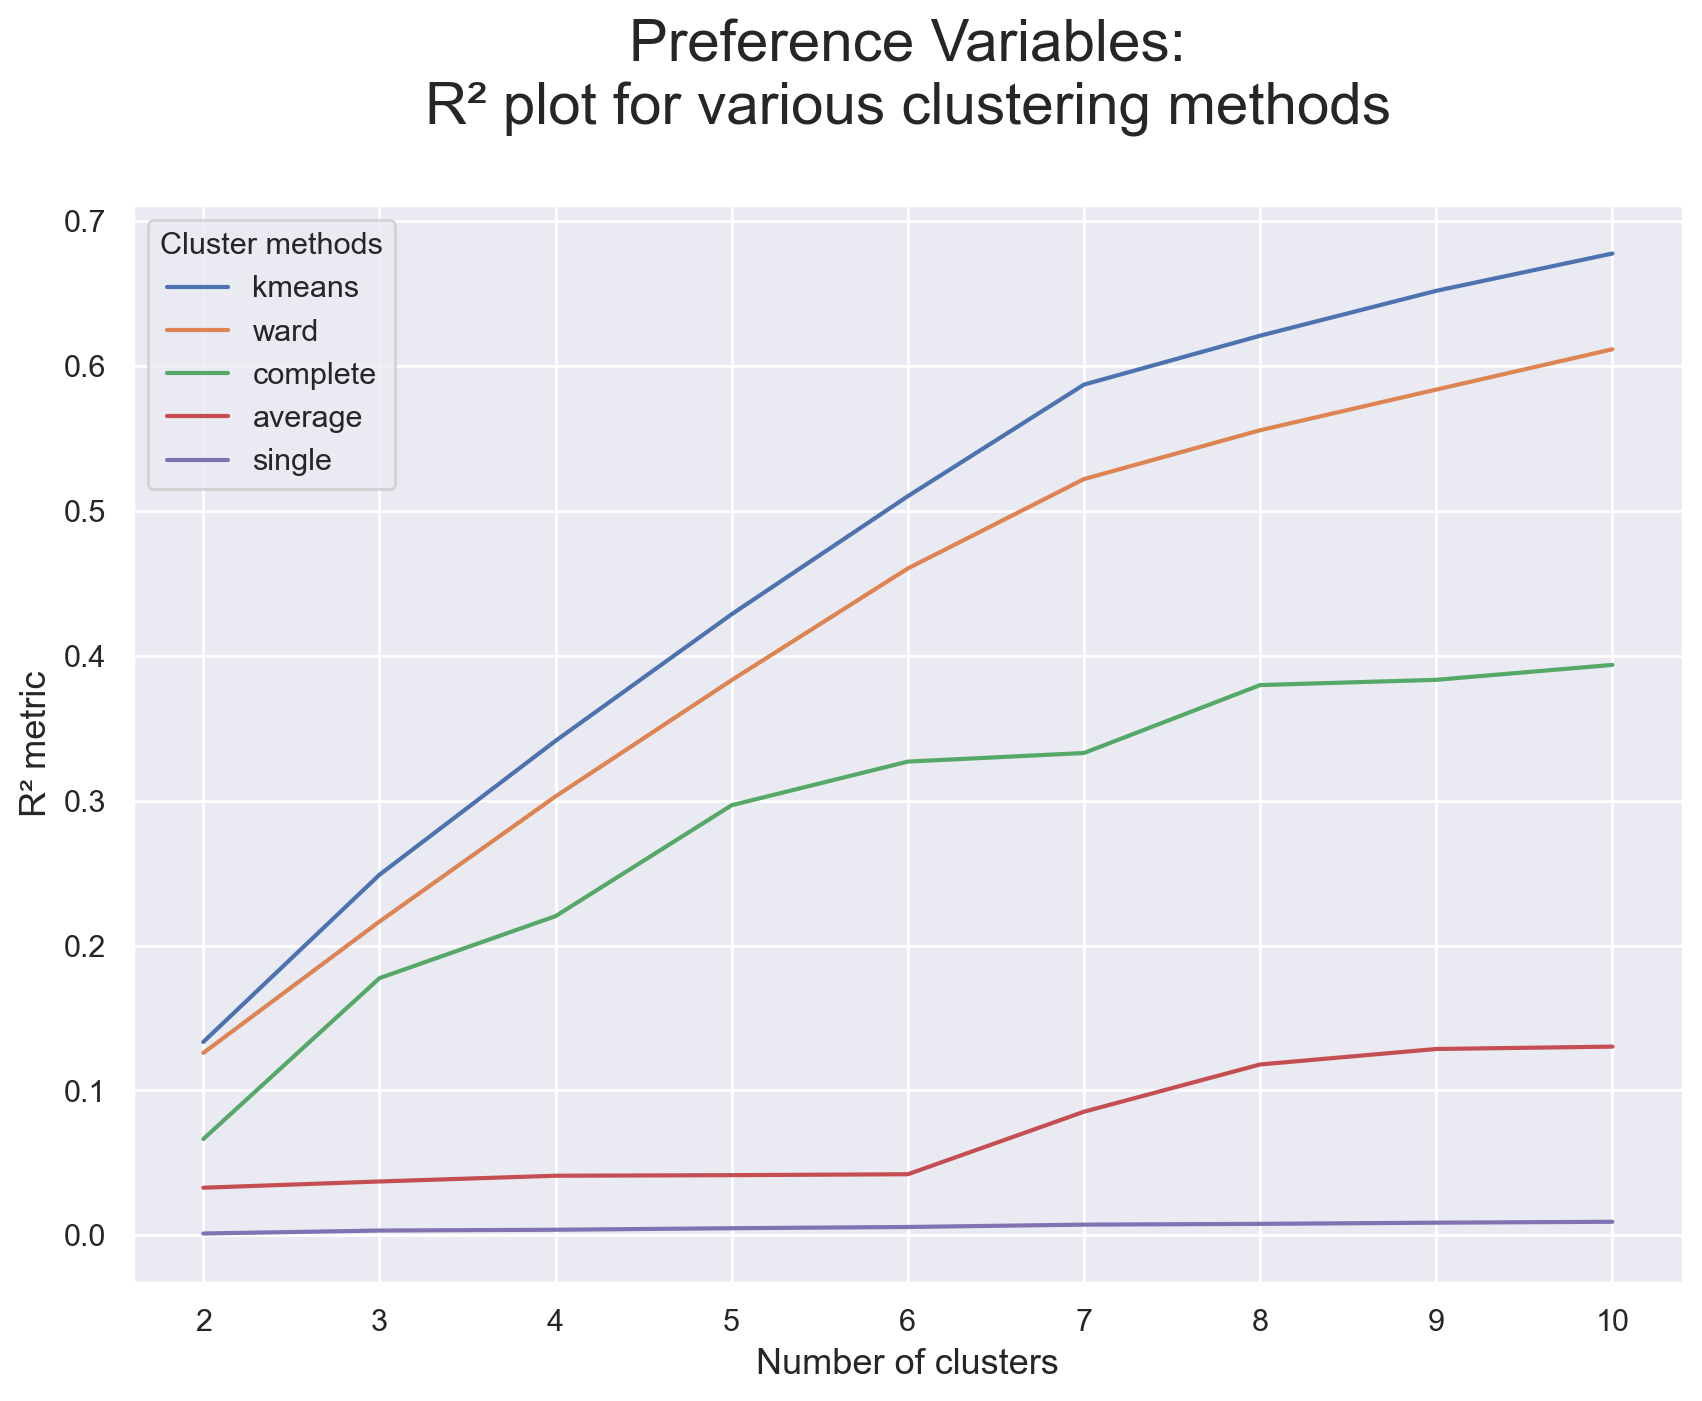

In [181]:
# Visualizing the R² scores for each cluster solution on demographic variables
r2_hc_PB.plot.line(figsize=(10,7))

plt.title("Preference Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

**Finding the optimal clusterer on Behavioral variables using Inertia and Silohette:**

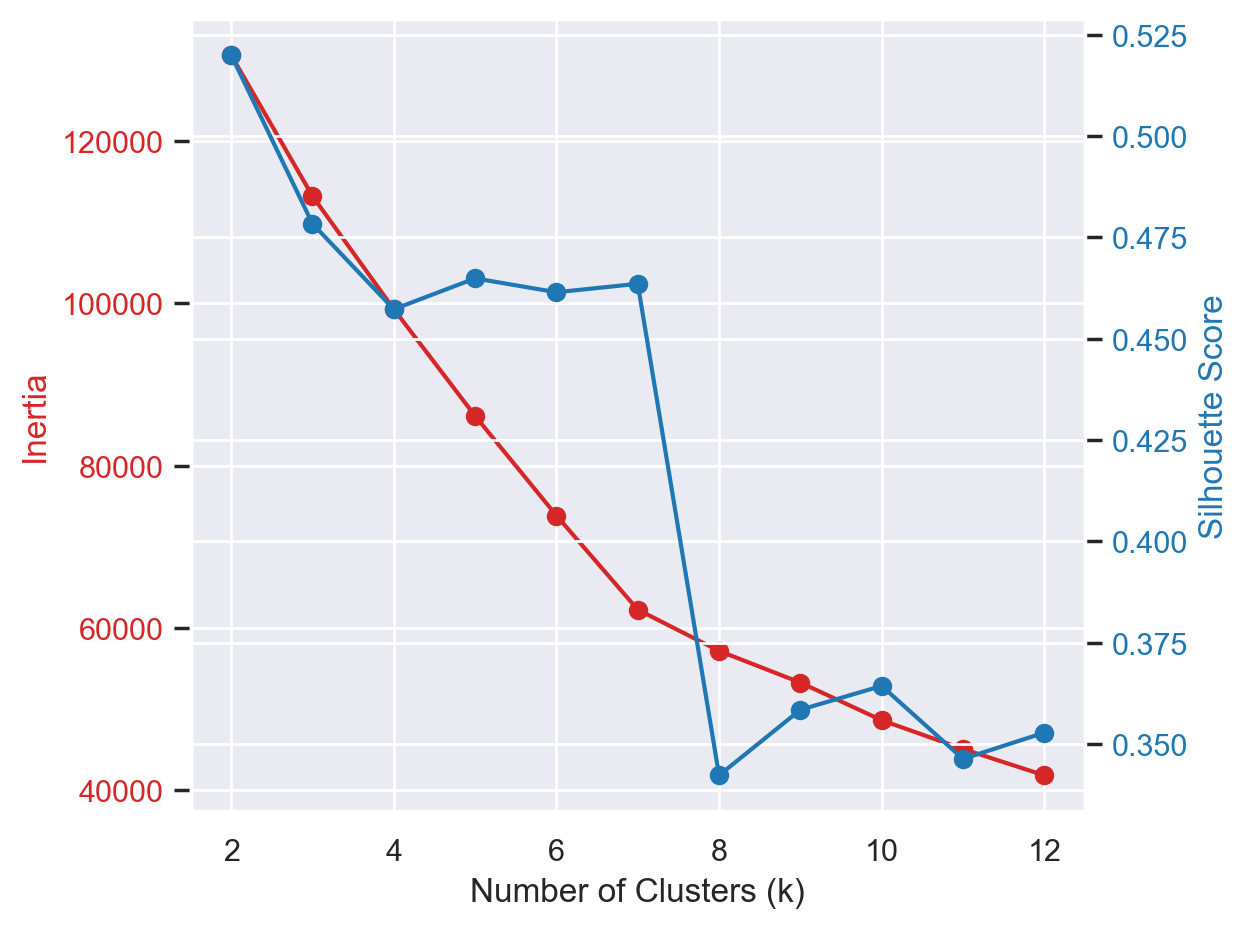

In [182]:
inertia_and_silhouette_plots(ABCDE_PB,2,12)

**K-Means with 7 Clusters seems like the best option**

In [183]:
# Creating a copy of the financial dataframe for K-Means clustering
ABCDE_PB_KM = ABCDE_PB.copy()

# Applying K-Means clustering with 7 clusters
kmeans_model = KMeans(n_clusters=7, init='k-means++', n_init=20, random_state=42)
ABCDE_PB_KM['cluster_labels_PB'] = kmeans_model.fit_predict(ABCDE_PB)

# Calculating the mean values for each cluster
cluster_means = ABCDE_PB_KM.groupby('cluster_labels_PB').mean()

In [184]:
cluster_means

,CUI_Asian_Fusion,CUI_Western,CUI_Sweets_and_Beverages,CUI_Snacks,CUI_HEALTHY,CUI_Other
cluster_labels_PB,,,,,,
0,-0.251422,-0.227495,-0.225899,-0.167850,-0.117220,-0.173520
1,0.187004,-0.184492,0.062534,3.989929,-0.105194,-0.289289
2,-0.201416,2.686123,-0.221387,-0.213384,-0.118949,-0.046833
3,-0.102028,-0.210734,2.561067,-0.120130,-0.054231,-0.185759
4,-0.013650,-0.105009,-0.018871,-0.182563,5.286481,-0.001978
5,2.300821,-0.092008,-0.034562,-0.042915,-0.067154,-0.175813
6,-0.090206,0.069727,-0.082455,-0.169276,-0.039517,3.016300


<a class="anchor" id="age">

### 5.2.2 Self-organizing Map

</a>

In [ ]:
################### Add code here for self organizing Map applied on First Perspective #######################################

<a class="anchor" id="age">

### 5.2.3 DBSCAN

</a>

In [ ]:
################### Add code here for DBSCAN applied on First Perspective #######################################

<a class="anchor" id="age">

### 5.2.4 Comparing Models for Preference Perspective

</a>

In [ ]:
#Once you finish sclustering add your code here

C:\Users\user\AppData\Local\Temp\ipykernel_11456\1903578785.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw = np.sum(df.groupby(labels).apply(get_ss_))  # Within-cluster sum of squares


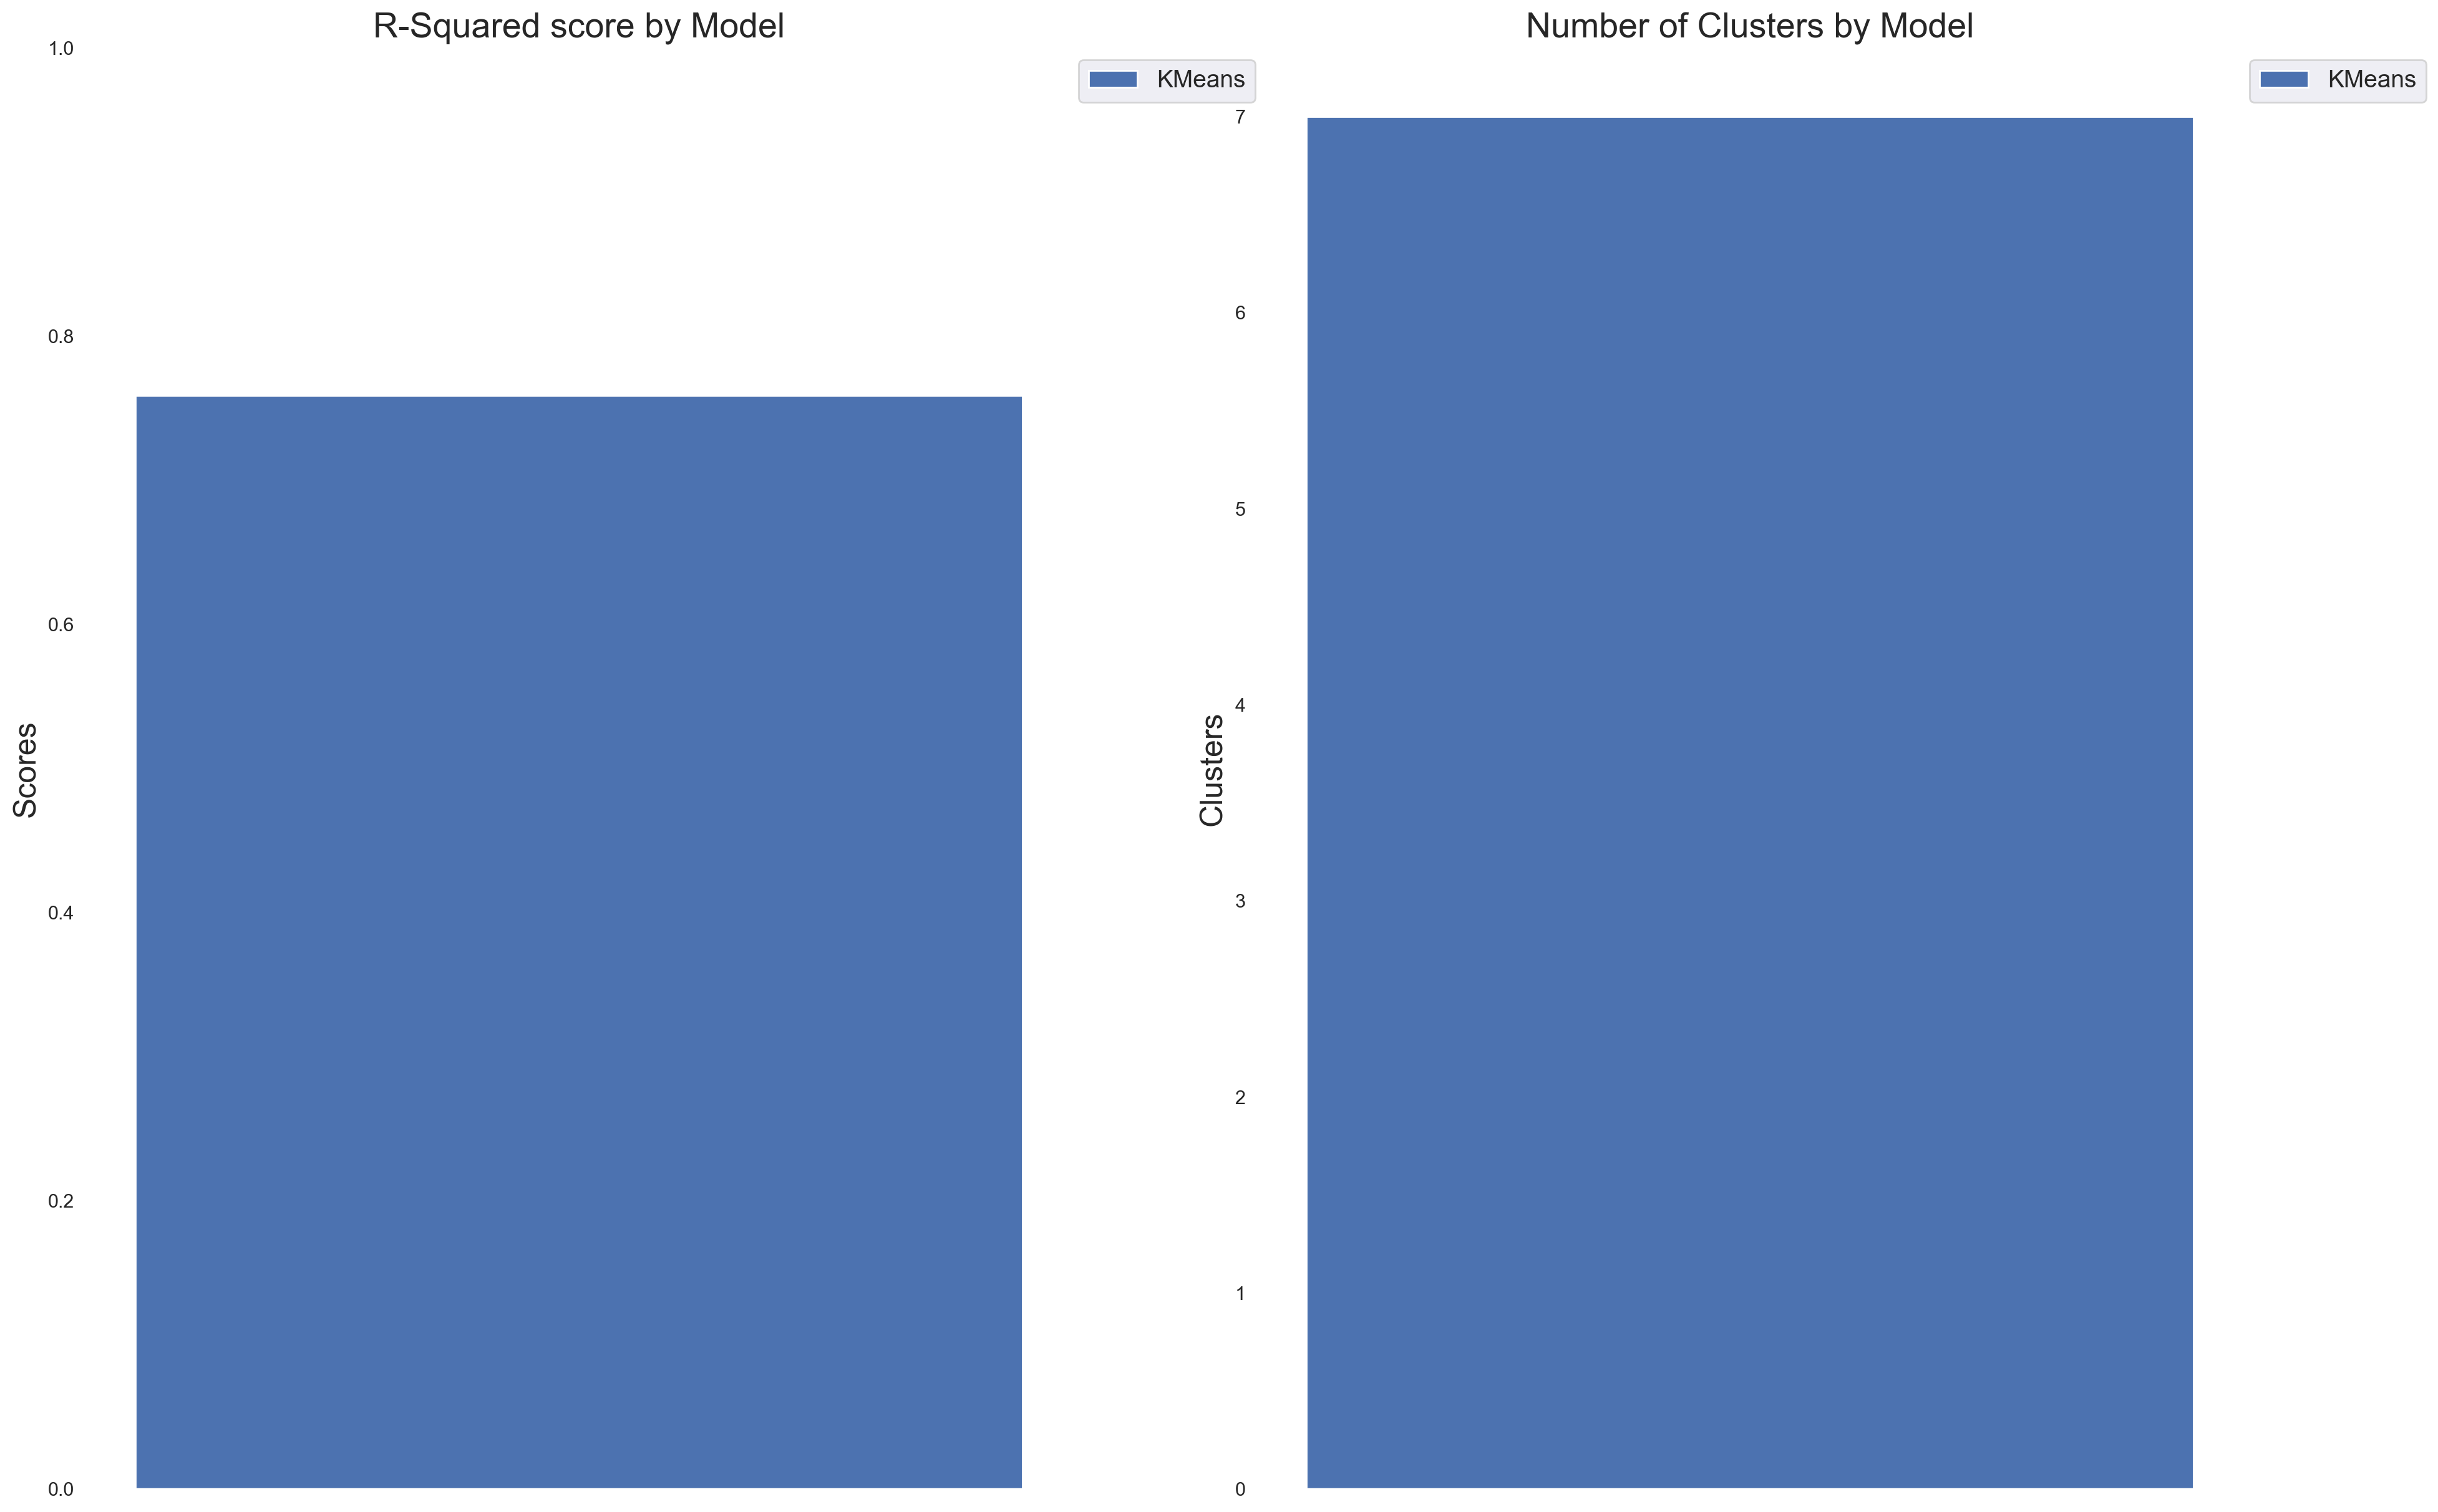

In [185]:
Preference_models = {
    "KMeans": ABCDE_PB_KM,
    # "SOMs": ABCDE_PB_SOM, # Add SOM clustering results when available
    # "DBSCAN": ABCDE_PB_DBSCAN, # Add DBSCAN results when available
}

# Assuming compare_models is a function defined elsewhere, we call it with the correct parameters
compare_models(Preference_models, cluster_column="cluster_labels_PB")

<a class="anchor" id="age">

## 5.3 Merging Clusters

</a>

In [186]:
ABCDE_final['behavior_labels'] = ABCDE_VB_KM['cluster_labels_VB']
ABCDE_final['preference_labels'] = ABCDE_PB_KM['cluster_labels_PB']


In [187]:
pd.crosstab(ABCDE_final['behavior_labels'],
            ABCDE_final['preference_labels'])

preference_labels,0,1,2,3,4,5,6
behavior_labels,,,,,,,
0,359,282,165,319,74,799,18
1,7855,199,166,372,68,150,142
2,670,104,588,282,103,560,539
3,13280,545,1050,879,231,786,692


In [188]:
metric_features = ['is_chain', 'first_order', 'last_order', 'Weekdays', 'Weekends',
       'Morning', 'Afternoon', 'Evening', 'Night', 'Monetary Spending',
       'Recency', 'CUI_Asian_Fusion', 'CUI_Western',
       'CUI_Sweets_and_Beverages', 'CUI_Snacks', 'CUI_HEALTHY', 'CUI_Other','behavior_labels', 'preference_labels']

In [189]:
ABCDE_centroids = ABCDE_final.groupby(['behavior_labels', 'preference_labels'])\
    [metric_features].mean()
ABCDE_centroids

is_chain  first_order  last_order  \
behavior_labels preference_labels                                      
0               0                  0.278407    -0.189690    0.486651   
                1                  0.312575    -0.511523    0.630247   
                2                  0.329832    -0.404321    0.538124   
                3                  0.396422    -0.435681    0.597980   
                4                  0.105405    -0.433499    0.588130   
                5                  0.286521    -0.515101    0.607978   
                6                  0.201091    -0.578929    0.486057   
1               0                 -0.191645    -0.228621   -1.344721   
                1                 -0.578859    -0.300810   -1.437648   
                2                 -0.452385    -0.520326   -1.303712   
                3                 -0.015900    -0.291247   -1.416890   
                4                 -0.565296    -0.285888   -1.434208   
                5                 -0.263406    -0.465035   -1.275752   
                6                 -0.413239    -0.406685   -1.407343   
2               0                  0.465298    -0.789495    0.738699   
                1                  0.263728    -0.784288    0.689196   
                2                  0.167855    -0.801382    0.776605   
                3                  0.466242    -0.775746    0.764087   
                4                  0.459572    -0.811910    0.844419   
                5                  0.411490    -0.819517    0.788393   
                6                  0.432299    -0.783556    0.801440   
3               0                  0.015968     0.410972    0.475598   
                1                 -0.147100     0.286777    0.474366   
                2                 -0.248840    -0.217021    0.527234   
                3                  0.162425     0.265079    0.495471   
                4                  0.042923     0.239213    0.543539   
                5                 -0.021601    -0.079542    0.529448   
                6                  0.038602    -0.035307    0.520618   

                                   Weekdays  Weekends   Morning  Afternoon  \
behavior_labels preference_labels                                            
0               0                  0.163851  0.197771 -0.201375  -0.509784   
                1                  0.705358  0.596051  0.883150  -0.084375   
                2                  0.458141  0.315252  0.256660  -0.399379   
                3                  0.575545  0.469722  0.677693  -0.348270   
                4                  0.789655  0.359844  0.666401  -0.421725   
                5                  0.669973  0.584115  0.735655  -0.397406   
                6                  1.161529  0.676934  0.297757   0.070012   
1               0                 -0.510717 -0.416995 -0.357302  -0.405514   
                1                 -0.485337 -0.400256 -0.277603  -0.284341   
                2                 -0.355426 -0.280952 -0.348315  -0.202636   
                3                 -0.477825 -0.394494 -0.125895  -0.524193   
                4                 -0.473846 -0.437309 -0.098830  -0.558207   
                5                 -0.329379 -0.205284 -0.067011  -0.417466   
                6                 -0.380853 -0.366688 -0.325778  -0.205958   
2               0                  1.430470  1.393122  0.514598   1.196409   
                1                  1.644519  1.434469  1.081672   1.835611   
                2                  1.813529  1.594212  0.779724   2.217908   
                3                  1.960580  1.830225  1.538193   1.782010   
                4                  2.075126  1.512776  1.960264   1.641825   
                5                  2.059520  1.717909  1.302650   1.973337   
                6                  2.025530  1.617469  1.058521   1.927290   
3               0                 -0.244443 -0.209569 -0.194603  -0.156671   
  

In [190]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)

hclust_labels = hclust.fit_predict(ABCDE_centroids)

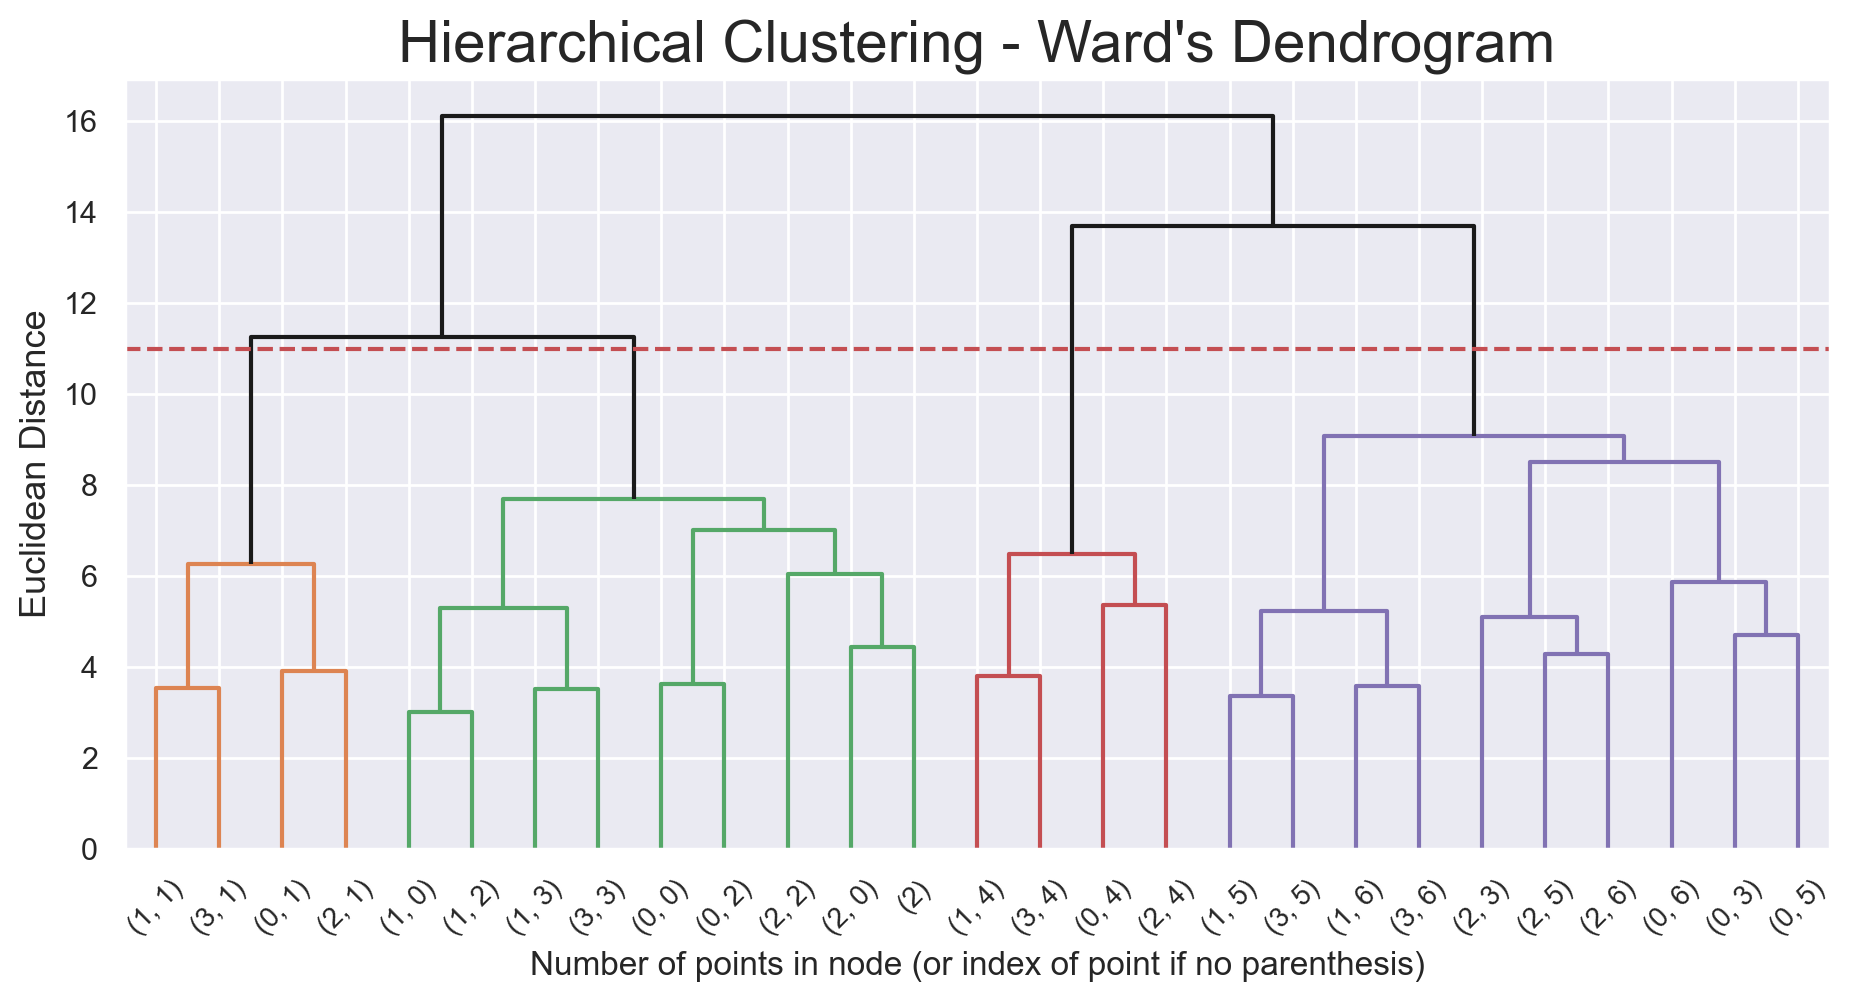

In [192]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned

y_threshold = 11
# y_threshold = 3.3

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=ABCDE_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [193]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(ABCDE_centroids)
ABCDE_centroids['hclust_labels'] = hclust_labels

ABCDE_centroids  # centroid's cluster labels

is_chain  first_order  last_order  \
behavior_labels preference_labels                                      
0               0                  0.278407    -0.189690    0.486651   
                1                  0.312575    -0.511523    0.630247   
                2                  0.329832    -0.404321    0.538124   
                3                  0.396422    -0.435681    0.597980   
                4                  0.105405    -0.433499    0.588130   
                5                  0.286521    -0.515101    0.607978   
                6                  0.201091    -0.578929    0.486057   
1               0                 -0.191645    -0.228621   -1.344721   
                1                 -0.578859    -0.300810   -1.437648   
                2                 -0.452385    -0.520326   -1.303712   
                3                 -0.015900    -0.291247   -1.416890   
                4                 -0.565296    -0.285888   -1.434208   
                5                 -0.263406    -0.465035   -1.275752   
                6                 -0.413239    -0.406685   -1.407343   
2               0                  0.465298    -0.789495    0.738699   
                1                  0.263728    -0.784288    0.689196   
                2                  0.167855    -0.801382    0.776605   
                3                  0.466242    -0.775746    0.764087   
                4                  0.459572    -0.811910    0.844419   
                5                  0.411490    -0.819517    0.788393   
                6                  0.432299    -0.783556    0.801440   
3               0                  0.015968     0.410972    0.475598   
                1                 -0.147100     0.286777    0.474366   
                2                 -0.248840    -0.217021    0.527234   
                3                  0.162425     0.265079    0.495471   
                4                  0.042923     0.239213    0.543539   
                5                 -0.021601    -0.079542    0.529448   
                6                  0.038602    -0.035307    0.520618   

                                   Weekdays  Weekends   Morning  Afternoon  \
behavior_labels preference_labels                                            
0               0                  0.163851  0.197771 -0.201375  -0.509784   
                1                  0.705358  0.596051  0.883150  -0.084375   
                2                  0.458141  0.315252  0.256660  -0.399379   
                3                  0.575545  0.469722  0.677693  -0.348270   
                4                  0.789655  0.359844  0.666401  -0.421725   
                5                  0.669973  0.584115  0.735655  -0.397406   
                6                  1.161529  0.676934  0.297757   0.070012   
1               0                 -0.510717 -0.416995 -0.357302  -0.405514   
                1                 -0.485337 -0.400256 -0.277603  -0.284341   
                2                 -0.355426 -0.280952 -0.348315  -0.202636   
                3                 -0.477825 -0.394494 -0.125895  -0.524193   
                4                 -0.473846 -0.437309 -0.098830  -0.558207   
                5                 -0.329379 -0.205284 -0.067011  -0.417466   
                6                 -0.380853 -0.366688 -0.325778  -0.205958   
2               0                  1.430470  1.393122  0.514598   1.196409   
                1                  1.644519  1.434469  1.081672   1.835611   
                2                  1.813529  1.594212  0.779724   2.217908   
                3                  1.960580  1.830225  1.538193   1.782010   
                4                  2.075126  1.512776  1.960264   1.641825   
                5                  2.059520  1.717909  1.302650   1.973337   
                6                  2.025530  1.617469  1.058521   1.927290   
3               0                 -0.244443 -0.209569 -0.194603  -0.156671   
  

In [194]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = ABCDE_centroids['hclust_labels'].to_dict()
cluster_mapper


{(0, 0): 1,
 (0, 1): 3,
 (0, 2): 1,
 (0, 3): 0,
 (0, 4): 2,
 (0, 5): 0,
 (0, 6): 0,
 (1, 0): 1,
 (1, 1): 3,
 (1, 2): 1,
 (1, 3): 1,
 (1, 4): 2,
 (1, 5): 0,
 (1, 6): 0,
 (2, 0): 1,
 (2, 1): 3,
 (2, 2): 1,
 (2, 3): 0,
 (2, 4): 2,
 (2, 5): 0,
 (2, 6): 0,
 (3, 0): 1,
 (3, 1): 3,
 (3, 2): 1,
 (3, 3): 1,
 (3, 4): 2,
 (3, 5): 0,
 (3, 6): 0}

In [195]:
ABCDE_ = ABCDE_final.copy()

In [196]:
# Mapping the hierarchical clusters on the centroids to the observations
ABCDE_['merged_labels'] = ABCDE_.apply(
    lambda row: cluster_mapper[
        (row['behavior_labels'], row['preference_labels'])
    ], axis=1
)

ABCDE_

,is_chain,first_order,last_order,Weekdays,Weekends,Morning,Afternoon,Evening,Night,Monetary Spending,Recency,CUI_Asian_Fusion,CUI_Western,CUI_Sweets_and_Beverages,CUI_Snacks,CUI_HEALTHY,CUI_Other,customer_region_2360,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,last_promo_-,last_promo_DELIVERY,last_promo_DISCOUNT,last_promo_FREEBIE,payment_method_CARD,payment_method_CASH,payment_method_DIGI,buyer_type_One-Time Buyer,buyer_type_Repeated Buyer,cities_2,cities_4,cities_8,behavior_labels,preference_labels,merged_labels
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0.484321,-1.178855,-2.703508,-0.864673,0.447531,-0.559604,-0.683597,0.611294,-0.384912,-0.204168,2.703508,0.439665,-0.505838,-0.348921,-0.315255,-0.177263,-0.325095,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0,1
5d272b9dcb,0.484321,-1.178855,-2.703508,-0.864673,0.447531,0.375699,-0.683597,-0.479946,-0.384912,-0.437897,2.703508,-0.404496,0.308272,-0.348921,-0.315255,-0.177263,-0.325095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,1
f6d1b2ba63,0.484321,-1.178855,-2.703508,-0.864673,0.447531,0.375699,-0.683597,-0.479946,-0.384912,-0.679844,2.703508,-0.644344,0.078391,-0.348921,-0.315255,-0.177263,-0.325095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,1
180c632ed8,0.484321,-1.178855,-2.660373,-0.581947,-0.142362,-0.091952,-0.296027,-0.479946,-0.384912,-0.139391,2.660373,0.540258,-0.505838,-0.348921,-0.315255,-0.177263,-0.325095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,1
4eb37a6705,-2.064748,-1.178855,-2.660373,-0.581947,-0.142362,0.375699,-0.683597,-0.479946,-0.384912,0.437801,2.660373,0.889708,0.419402,-0.348921,-0.315255,-0.177263,-0.325095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.484321,-1.178855,-2.746642,-0.864673,-0.142362,-0.559604,-0.296027,-0.479946,-0.384912,-0.466176,2.746642,-0.644344,-0.505838,1.290799,-0.315255,-0.177263,-0.325095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,3,1
f6b6709018,-2.064748,-1.178855,-2.746642,-0.864673,-0.142362,-0.559604,-0.296027,-0.479946,-0.384912,-0.466176,2.746642,-0.644344,0.639758,-0.348921,-0.315255,-0.177263,-0.325095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,0,1
f74ad8ce3f,0.484321,-1.178855,-2.746642,-0.864673,-0.142362,-0.559604,-0.683597,-0.479946,0.452548,-0.472219,2.746642,-0.644344,-0.505838,1.268076,-0.315255,-0.177263,-0.325095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,3,1


In [197]:
merged_metric_features= ['is_chain', 'first_order', 'last_order', 'Weekdays', 'Weekends',
       'Morning', 'Afternoon', 'Evening', 'Night', 'Monetary Spending',
       'Recency', 'CUI_Asian_Fusion', 'CUI_Western',
       'CUI_Sweets_and_Beverages', 'CUI_Snacks', 'CUI_HEALTHY', 'CUI_Other','behavior_labels', 'preference_labels', 'merged_labels']

In [198]:
# Merged cluster centroids
ABCDE_[merged_metric_features].groupby('merged_labels').mean()

,is_chain,first_order,last_order,Weekdays,Weekends,Morning,Afternoon,Evening,Night,Monetary Spending,Recency,CUI_Asian_Fusion,CUI_Western,CUI_Sweets_and_Beverages,CUI_Snacks,CUI_HEALTHY,CUI_Other,behavior_labels,preference_labels
merged_labels,,,,,,,,,,,,,,,,,,,
0,0.201884,-0.437474,0.503717,0.824098,0.668243,0.627360,0.538420,0.331930,0.593394,1.092080,-0.503717,1.267410,-0.011675,0.435640,-0.069546,-0.039831,0.884850,1.746676,5.044087
1,-0.036559,0.092078,-0.109760,-0.208915,-0.171202,-0.180623,-0.133893,-0.068495,-0.143974,-0.306599,0.109760,-0.253567,-0.008179,-0.108779,-0.173285,-0.117044,-0.168740,2.227230,0.302986
2,0.055906,-0.167832,0.333042,0.514506,0.286426,0.692051,0.187622,-0.058122,0.375135,0.539150,-0.333042,-0.013650,-0.105009,-0.018871,-0.182563,5.286481,-0.001978,2.031513,4.000000
3,-0.070609,-0.114498,0.196322,0.150638,0.142666,0.316518,0.037695,-0.267492,0.411045,1.368401,-0.196322,0.187004,-0.184492,0.062534,3.989929,-0.105194,-0.289289,1.807080,1.000000


<a class="anchor" id="age">

## 6. Analyzing Merging Clusters

</a>

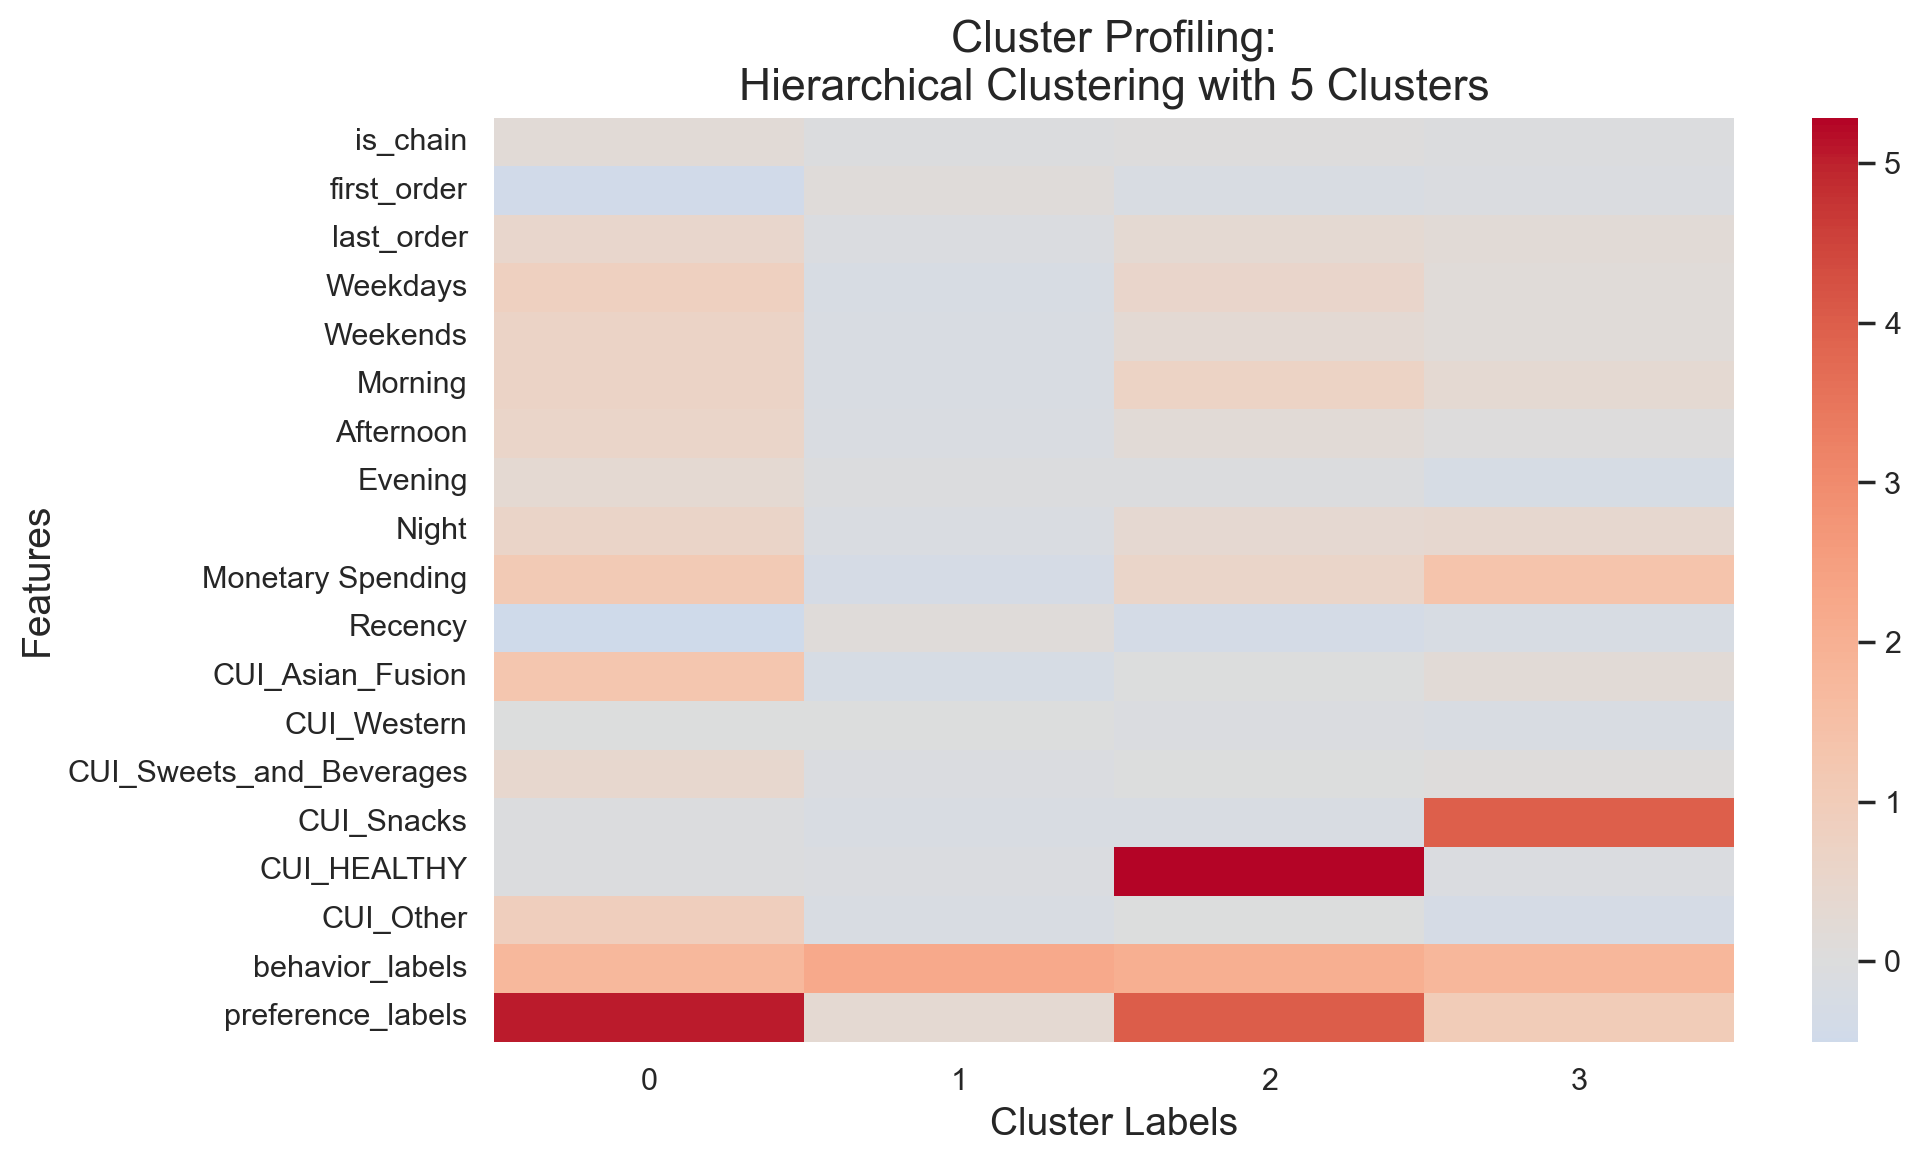

In [199]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size to make it more legible

# Compute the mean profile for each cluster
hc_profile = ABCDE_[merged_metric_features].groupby('merged_labels').mean().T

# Plot the heatmap with a new color palette
sns.heatmap(
    hc_profile,
    center=0, 
    annot=False,  # Set to True if you want values displayed in each cell
    cmap="coolwarm",  # Change this to your desired color palette
    fmt=".2f",
    ax=ax
)

# Add labels and title
ax.set_xlabel("Cluster Labels", fontsize=14)
ax.set_ylabel("Features", fontsize=14)  # Adding this for clarity
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 5 Clusters", fontsize=16)

# Display the plot
plt.show()


<a class="anchor" id="age">

## 7. Profiling with unused categorical data

</a>

In [200]:
profiling_values = ['customer_region_2360', 'customer_region_2440',
       'customer_region_2490', 'customer_region_4140', 'customer_region_4660',
       'customer_region_8370', 'customer_region_8550', 'customer_region_8670',
       'last_promo_-', 'last_promo_DELIVERY', 'last_promo_DISCOUNT',
       'last_promo_FREEBIE', 'payment_method_CARD', 'payment_method_CASH',
       'payment_method_DIGI', 'buyer_type_One-Time Buyer',
       'buyer_type_Repeated Buyer', 'cities_2', 'cities_4', 'cities_8','merged_labels']

In [201]:
ABCDE_[profiling_values].groupby(['merged_labels']).sum()


,customer_region_2360,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,last_promo_-,last_promo_DELIVERY,last_promo_DISCOUNT,last_promo_FREEBIE,payment_method_CARD,payment_method_CASH,payment_method_DIGI,buyer_type_One-Time Buyer,buyer_type_Repeated Buyer,cities_2,cities_4,cities_8
merged_labels,,,,,,,,,,,,,,,,,,,,
0,848.0,130.0,37.0,61.0,1359.0,71.0,79.0,1702.0,2774.0,503.0,412.0,598.0,3175.0,486.0,626.0,150.0,4137.0,1015.0,1420.0,1852.0
1,7796.0,1335.0,401.0,776.0,7765.0,365.0,322.0,6624.0,12709.0,5390.0,3842.0,3443.0,15486.0,4834.0,5064.0,6747.0,18637.0,9532.0,8541.0,7311.0
2,50.0,5.0,2.0,2.0,210.0,10.0,5.0,192.0,242.0,99.0,61.0,74.0,317.0,79.0,80.0,52.0,424.0,57.0,212.0,207.0
3,29.0,1.0,1.0,13.0,25.0,45.0,45.0,971.0,671.0,188.0,105.0,166.0,782.0,133.0,215.0,179.0,951.0,31.0,38.0,1061.0


In [202]:
def plot_profiling_barplots(df, merged_labels_col, features):

    # Group the data by merged labels and sum up counts for each feature
    grouped_data = df.groupby(merged_labels_col).sum()

    # Reset index to make merged_labels a column
    grouped_data.reset_index(inplace=True)

    # Calculate the number of rows and columns dynamically
    n_features = len(features)
    n_cols = 4  # You can adjust this based on your preference
    n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Ensures we cover all features
    
    # Create subplots (adjust size depending on number of rows)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))  # Adjust size based on number of rows and columns
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    # Create separate bar plots for each feature
    for i, feature in enumerate(features):
        sns.barplot(x=merged_labels_col, y=feature, data=grouped_data, color='skyblue', ax=axes[i])

        # Customize each subplot
        axes[i].set_title(f'{feature} by {merged_labels_col}')  # Title of the plot
        axes[i].set_xlabel(merged_labels_col)  # X-axis label
        axes[i].set_ylabel('Counts')  # Y-axis label
        axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

    # Hide any empty subplots (if features are fewer than the total available subplots)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout for better spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


#### Region Bar plots by Merged labels

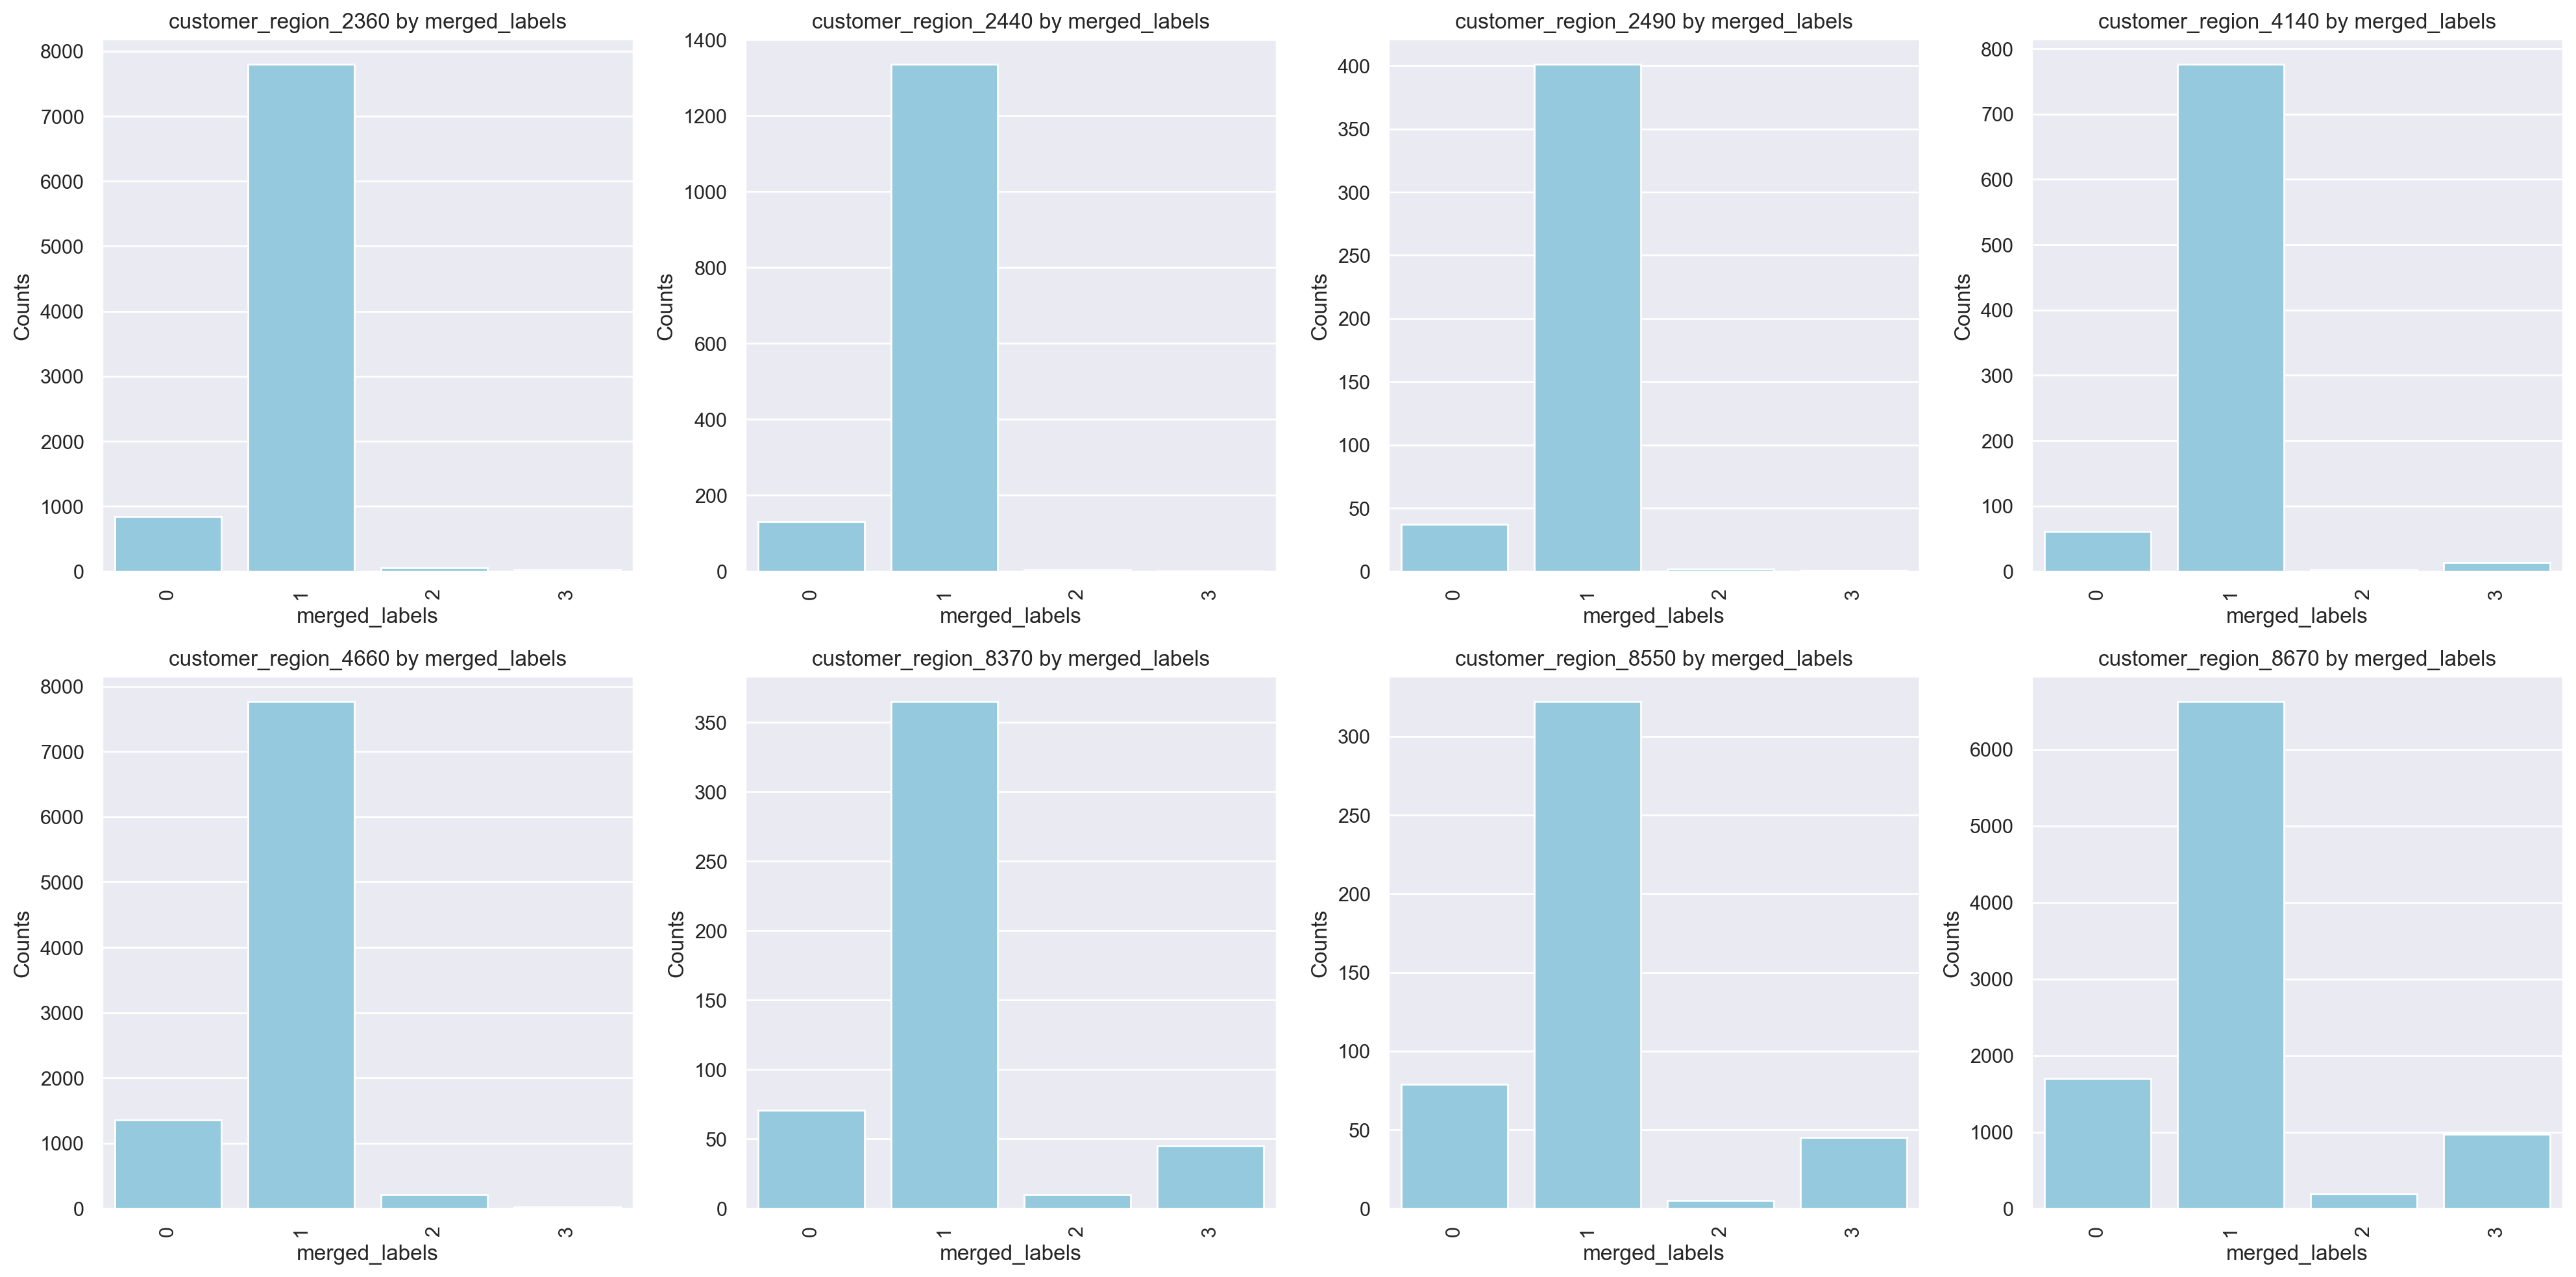

In [203]:
plot_profiling_barplots(ABCDE_, 'merged_labels', ['customer_region_2360', 'customer_region_2440', 'customer_region_2490',
                                                'customer_region_4140', 'customer_region_4660', 'customer_region_8370',
                                                'customer_region_8550', 'customer_region_8670'])

#### Cities plots by Merged labels

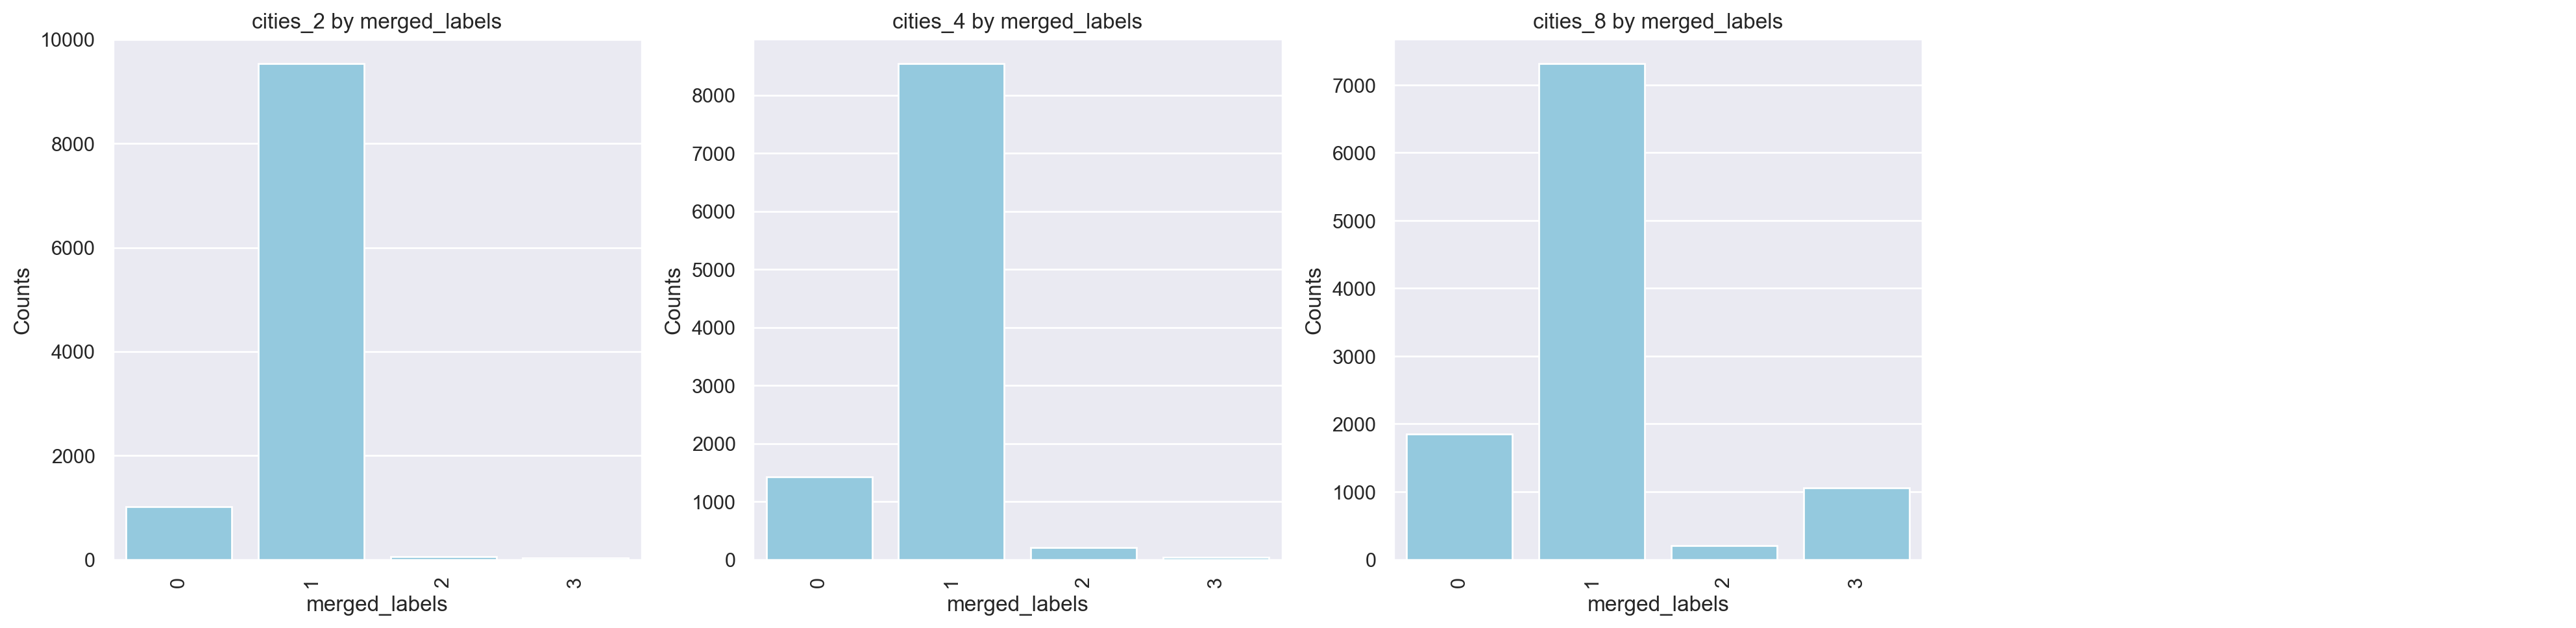

In [204]:
plot_profiling_barplots(ABCDE_, 'merged_labels', ['cities_2', 'cities_4', 'cities_8'])

#### Promo code plots by Merged labels

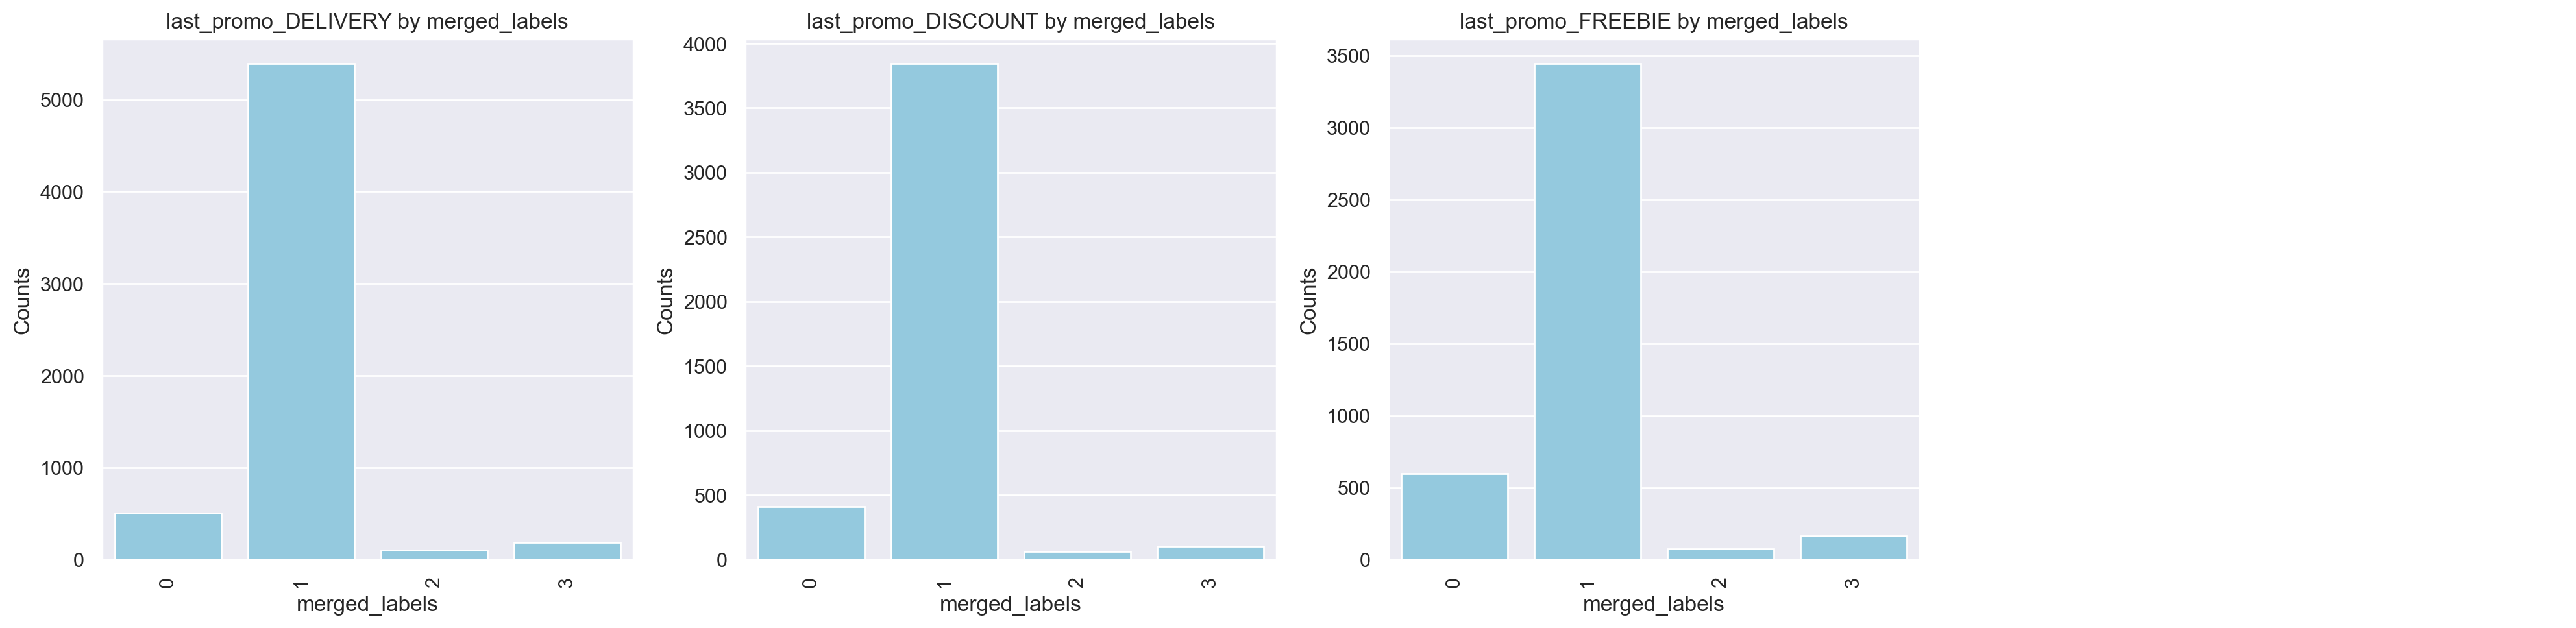

In [205]:
plot_profiling_barplots(ABCDE_, 'merged_labels', ['last_promo_DELIVERY', 'last_promo_DISCOUNT',
       'last_promo_FREEBIE'])

#### Payment Methods plots by Merged labels

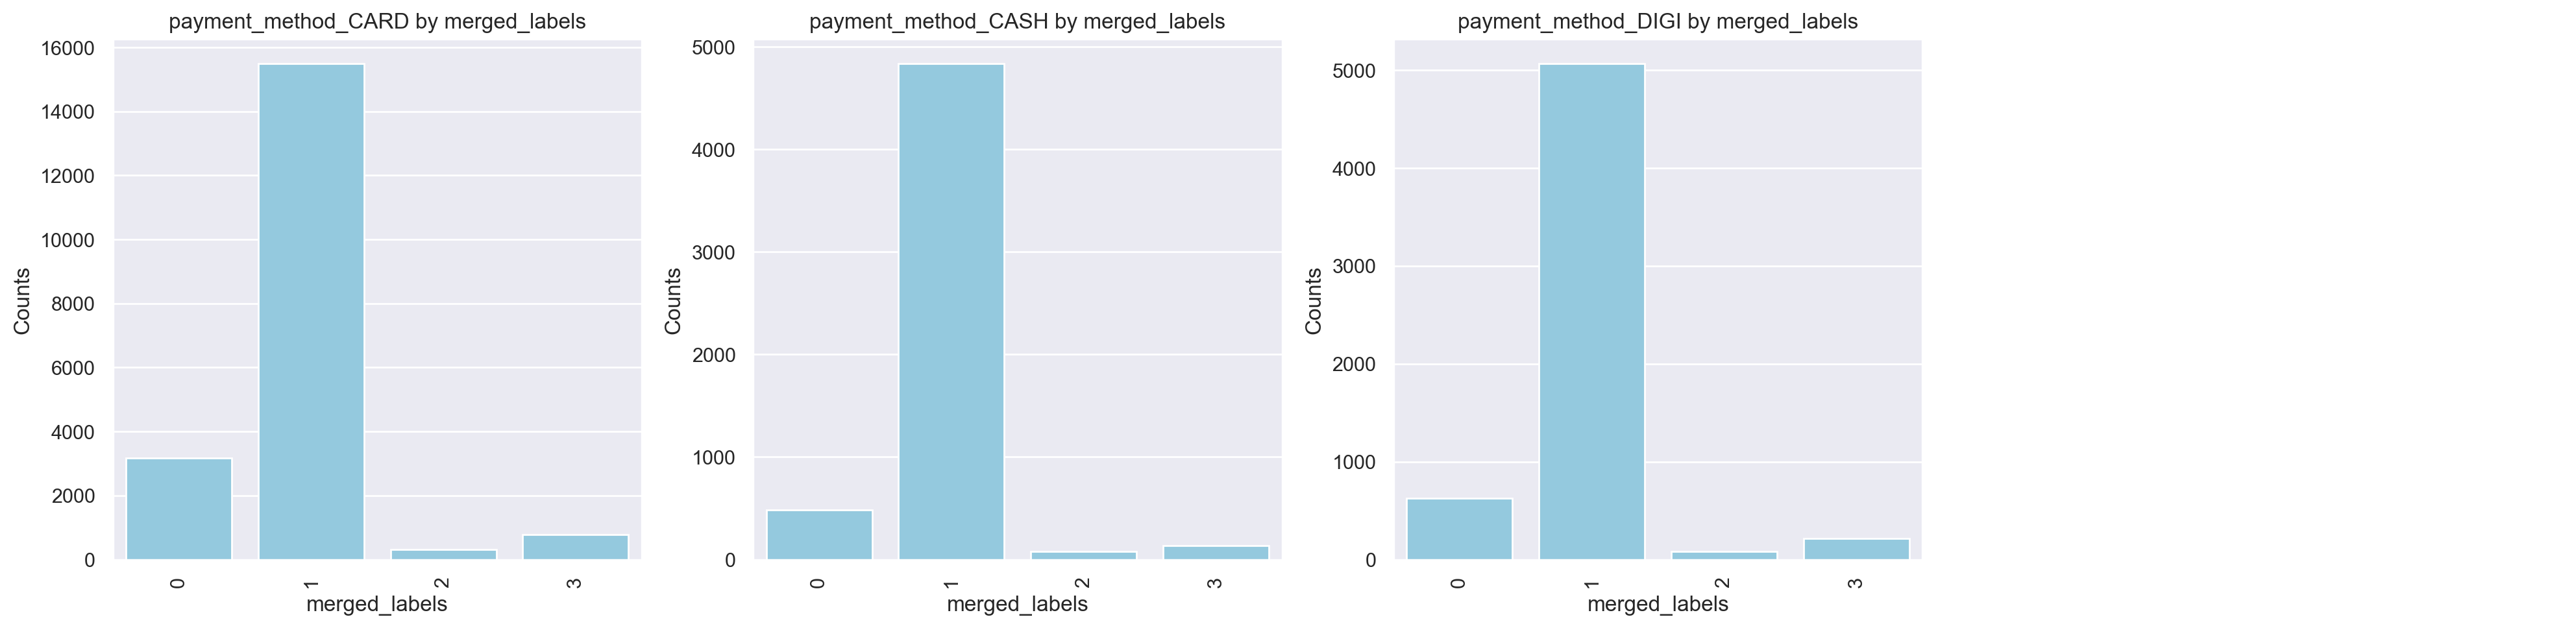

In [206]:
plot_profiling_barplots(ABCDE_, 'merged_labels', ['payment_method_CARD', 'payment_method_CASH',
       'payment_method_DIGI'])

#### Payment Methods plots by Merged labels

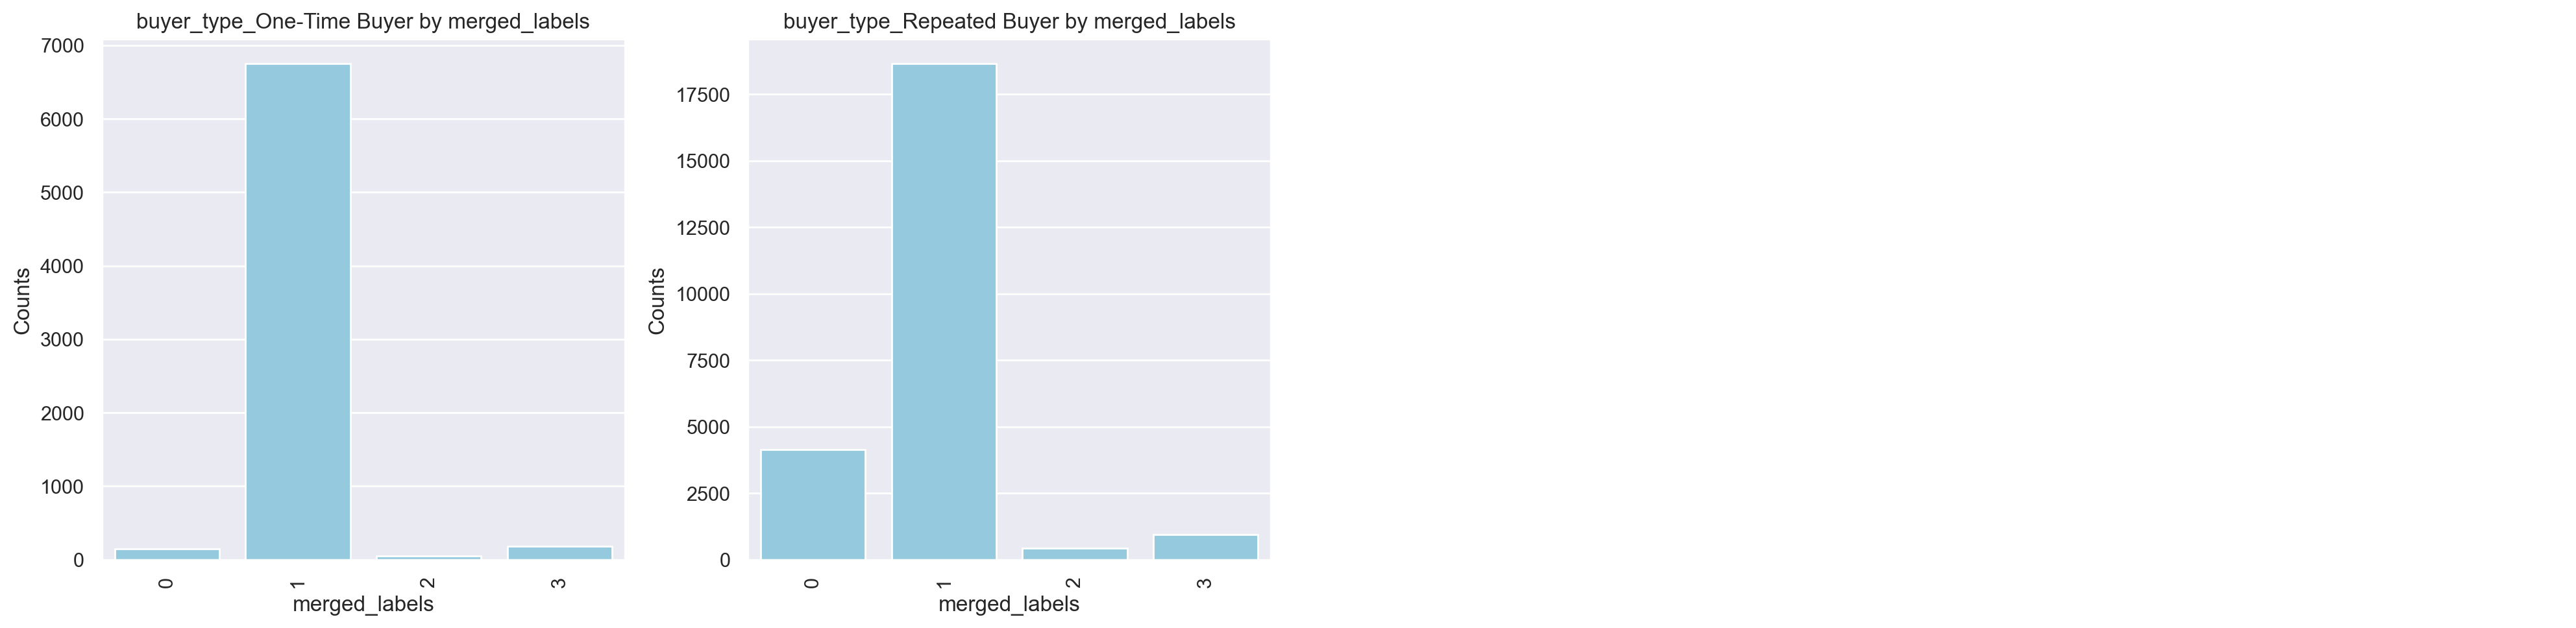

In [207]:
plot_profiling_barplots(ABCDE_, 'merged_labels', ['buyer_type_One-Time Buyer',
       'buyer_type_Repeated Buyer'])